### Setup & import

In [133]:
# Install as needed
# !pip install ___

In [134]:
import os
import kagglehub

import datetime

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as mpp
import seaborn as sb

import folium
from folium.plugins import MarkerCluster

pd.set_option("display.max_rows", 5)

### Download

In [135]:
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

filenames = os.listdir(path)
for i, filename in enumerate(filenames):
    print(i,filename)
    
dfs = {}

df_names = [
    "customers",
    "geolocations",
    "orders",
    
    "order_items",
    "order_payments",
    "order_reviews",
    
    "products",
    "sellers",
    "categories"
]

for i, name in enumerate(df_names):
    dfs[name] = pd.read_csv("/".join([path, filenames[i]]))

0 olist_customers_dataset.csv
1 olist_geolocation_dataset.csv
2 olist_orders_dataset.csv
3 olist_order_items_dataset.csv
4 olist_order_payments_dataset.csv
5 olist_order_reviews_dataset.csv
6 olist_products_dataset.csv
7 olist_sellers_dataset.csv
8 product_category_name_translation.csv


## Part 0 - Discovery

### Views

In [136]:
print("Views:")
for key in dfs:
    print('='*50)
    print(key.upper())
    print('='*50)
    display(dfs[key].head(3))

Views:
CUSTOMERS


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP

GEOLOCATIONS


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP

ORDERS


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00

ORDER_ITEMS


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  
2  2018-01-18 14:48:30  199.0          17.87

ORDER_PAYMENTS


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71

ORDER_REVIEWS


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5                  NaN                    NaN   
2             5                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13  
2  2018-02-17 00:00:00     2018-02-18 14:36:24

PRODUCTS


product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   
2  96bd76ec8810374ed1b65e291975717f         esporte_lazer   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0

SELLERS


seller_id  seller_zip_code_prefix     seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023        campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844      mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031  rio de janeiro   

  seller_state  
0           SP  
1           SP  
2           RJ

CATEGORIES


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto

### Infos

In [137]:
print("Infos:")
for key in dfs:
    print('='*50)
    print(key.upper())
    print('='*50)
    dfs[key].info()

Infos:
CUSTOMERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
GEOLOCATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city 

### Describe

In [138]:
print("Descriptions:")
pd.set_option("display.max_rows", 50)
for key in dfs:
    print('='*50)
    print(key.upper())
    print('='*50)
    display(dfs[key].describe(include= "all"))
pd.set_option("display.max_rows", 5)

Descriptions:
CUSTOMERS


customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

GEOLOCATIONS


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique             8011                27  
top           sao paulo                SP  
freq             135800            404268  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

ORDERS


order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 19:36:48   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

ORDER_ITEMS


order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  
count                112650  112650.000000  112650.000000  
unique                93318            NaN            NaN  
top     2018-03-01 02:50:48            NaN            NaN  
freq                     21            NaN            NaN  
mean                    NaN     120.653739      19.990320  
std                     NaN     183.633928      15.806405  
min                     NaN       0.850000       0.000000  
25%                     NaN      39.900000      13.080000  
50%                     NaN      74.990000      16.260000  
75%                     NaN     134.900000      21.150000  
max                     NaN    6735.000000     409.680000

ORDER_PAYMENTS


order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

ORDER_REVIEWS


review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     08528f70f579f0c830189efc523d2182  df56136b8031ecd28e200bb18e6ddb2e   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                11568                  40977   
unique           NaN                 4527                  36159   
top              NaN            Recomendo              Muito bom   
freq             NaN                  423                    230   
mean        4.086421                  NaN                    NaN   
std         1.347579                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
count                 99224                   99224  
unique                  636                   98248  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    463                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN

PRODUCTS


product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     106392145fca363410d287a815be6de4       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique                  NaN                         NaN                 NaN   
top                     NaN                         NaN                 NaN   
freq                    NaN                         NaN                 NaN   
mean              48.476949                  771.495285            2.188986   
std               10.245741                  635.115225            1.736766   
min                5.000000                    4.000000            1.000000   
25%               42.000000                  339.000000            1.000000   
50%               51.000000                  595.000000            1.000000   
75%               57.000000                  972.000000            3.000000   
max               76.000000                 3992.000000           20.000000   

        product_weight_g  product_length_cm  product_height_cm  \
count       32949.000000       32949.000000       32949.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2276.472488          30.815078          16.937661   
std          4282.038731          16.914458          13.637554   
min             0.000000           7.000000           2.000000   
25%           300.000000          18.000000           8.000000   
50%           700.000000          25.000000          13.000000   
75%          1900.000000          38.000000          21.000000   
max         40425.000000         105.000000         105.000000   

        product_width_cm  
count       32949.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean           23.196728  
std            12.079047  
min             6.000000  
25%            15.000000  
50%            20.000000  
75%            30.000000  
max           118.000000

SELLERS


seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     9e25199f6ef7e7c347120ff175652c3b                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

CATEGORIES


product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

### Relevant features

In [139]:
# These are features to be cleaned (column names relevant to the analysis questions)
relevant_features = {
    "order_id", 
    "customer_id", 
    "order_status", 
    "order_purchase_timestamp", 
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date", 
    
    "order_item_id", 
    "order_id", 
    "product_id",
    "price",
    "freight_value", 
    
    "review_id", 
    "order_id", 
    "review_score", 
    
    "order_id", 
    "payment_value", 
    
    "customer_id", 
    "customer_unique_id", 
    "customer_city", 
    "customer_id", 
    "customer_zip_code_prefix", 
    
    "product_category_name",
    "product_category_name_english"
}

## Part 1 - Cleaning

### NAs

In [140]:
print("NA count:")
for key in dfs:
    print('='*50)
    print(key.upper())
    print('='*50)
    print(dfs[key].isna().sum())

NA count:
CUSTOMERS
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
GEOLOCATIONS
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
ORDERS
order_id                            0
customer_id                         0
                                 ... 
order_delivered_customer_date    2965
order_estimated_delivery_date       0
Length: 8, dtype: int64
ORDER_ITEMS
order_id         0
order_item_id    0
                ..
price            0
freight_value    0
Length: 7, dtype: int64
ORDER_PAYMENTS
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
ORDER_REVIEWS
review_id                  0
order_id                   0
                          ..
review_creation

In [141]:
print("NAs dropped (on relevant columns only):")
for key in dfs:
    relevant_columns = set(dfs[key].columns) & relevant_features
    dfs[key] = dfs[key].dropna(subset= relevant_columns)
    
    print('='*50)
    print(key.upper())
    print("Columns affected:",relevant_columns)
    print('='*50)
    print(dfs[key].isna().sum())

NAs dropped (on relevant columns only):
CUSTOMERS
Columns affected: {'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_id'}
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
GEOLOCATIONS
Columns affected: set()
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
ORDERS
Columns affected: {'order_delivered_carrier_date', 'order_approved_at', 'customer_id', 'order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_timestamp', 'order_status'}
order_id                         0
customer_id                      0
                                ..
order_delivered_customer_date    0
order_estimated_delivery_date    0
Length: 8, dtype: int64
ORDER_ITEMS
Columns affected: {'freight_value', 'order_i

### Column types

Categories:

    datetime
    str
    int
    float

In [142]:
# First, print all colnames
for key in dfs:
    for colname in dfs[key].columns:
        print(colname)

customer_id
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state
geolocation_zip_code_prefix
geolocation_lat
geolocation_lng
geolocation_city
geolocation_state
order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
order_id
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
order_id
payment_sequential
payment_type
payment_installments
payment_value
review_id
order_id
review_score
review_comment_title
review_comment_message
review_creation_date
review_answer_timestamp
product_id
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
seller_id
seller_zip_code_prefix
seller_city
seller_state
product_category_name
product_category_name_english


In [143]:
# Second, define feature categories
datetime_features = {
    'shipping_limit_date',
    
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    
    'review_creation_date',
    'review_answer_timestamp'
}

str_features = {
    'payment_type',
    
    'customer_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    
    'geolocation_zip_code_prefix',
    'geolocation_city',
    'geolocation_state',
    'order_status',
    
    'order_id',
    
    'seller_id',
    'seller_zip_code_prefix',
    'seller_city',
    'seller_state',
    
    'product_id',
    'product_category_name',
    'product_category_name_english'
    
    'review_id',
    'review_comment_title',
    'review_comment_message'
}

int_features = {
    'payment_sequential',
    'payment_installments',
    
    'review_score',
    
    'order_item_id',
    
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty'
}

float_features = {
    'price',
    'freight_value',
    'payment_value',

    'geolocation_lat',
    'geolocation_lng',
    
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
}

In [144]:
# Third, convert accordingly 
for key in dfs:
    for colname in dfs[key].columns:
        if colname in datetime_features:
            dfs[key][colname] = pd.to_datetime(dfs[key][colname],
                                               format= '%Y-%m-%d %H:%M:%S',
                                               errors = 'coerce',
                                               cache = True)
        elif colname in str_features:
            dfs[key][colname] = dfs[key][colname].apply(str)
        elif colname in int_features:
            dfs[key][colname] = dfs[key][colname].apply(int)
        elif colname in float_features:
            dfs[key][colname] = pd.to_numeric(dfs[key][colname],
                                              errors = 'coerce').round(2)

### Data validation

In [145]:
# Overarching standardization
for key in dfs:
    for colname in dfs[key].columns:
        if colname in str_features:
            dfs[key][colname] = dfs[key][colname].str.strip()

# TODO: Per-column validation (str.lower(), reasonable numbers, outliers...)
# TODO: unique ID check

### Duplicates

In [146]:
print("Duplicate count:")
for key in dfs:
    print('='*50)
    print(key.upper())
    print("Duplicate count (before):", dfs[key].duplicated().sum())

Duplicate count:
CUSTOMERS
Duplicate count (before): 0
GEOLOCATIONS
Duplicate count (before): 882976
ORDERS
Duplicate count (before): 0
ORDER_ITEMS
Duplicate count (before): 0
ORDER_PAYMENTS
Duplicate count (before): 0
ORDER_REVIEWS
Duplicate count (before): 0
PRODUCTS
Duplicate count (before): 0
SELLERS
Duplicate count (before): 0
CATEGORIES
Duplicate count (before): 0


In [147]:
print("Duplicate drop:")
for key in dfs:
    print('='*50)
    print(key.upper())
    dfs[key] = dfs[key].drop_duplicates()
    print("Duplicate count (after):", dfs[key].duplicated().sum())

Duplicate drop:
CUSTOMERS
Duplicate count (after): 0
GEOLOCATIONS
Duplicate count (after): 0
ORDERS
Duplicate count (after): 0
ORDER_ITEMS
Duplicate count (after): 0
ORDER_PAYMENTS
Duplicate count (after): 0
ORDER_REVIEWS
Duplicate count (after): 0
PRODUCTS
Duplicate count (after): 0
SELLERS
Duplicate count (after): 0
CATEGORIES
Duplicate count (after): 0


### Final results

In [148]:
print("Summary:")
for key in dfs:
    print('='*50)
    print(key.upper())
    print('='*50)
    
    print("Duplicate count:", dfs[key].duplicated().sum())
    
    print('-'*50)
    print("NA counts:")
    print(dfs[key].isna().sum())
    
    print('-'*50)
    print("Info:")
    dfs[key].info()
    
    print('-'*50)
    print("Sample:")
    display(dfs[key])

Summary:
CUSTOMERS
Duplicate count: 0
--------------------------------------------------
NA counts:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
--------------------------------------------------
Sample:


customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
...                                 ...                               ...   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

      customer_zip_code_prefix          customer_city customer_state  
0                        14409                 franca             SP  
1                         9790  sao bernardo do campo             SP  
...                        ...                    ...            ...  
99439                    92120                 canoas             RS  
99440                     6703                  cotia             SP  

[99441 rows x 5 columns]

GEOLOCATIONS
Duplicate count: 0
--------------------------------------------------
NA counts:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 117187 entries, 0 to 1000155
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  117187 non-null  object 
 1   geolocation_lat              117187 non-null  float64
 2   geolocation_lng              117187 non-null  float64
 3   geolocation_city             117187 non-null  object 
 4   geolocation_state            117187 non-null  object 
dtypes: float64(2), object(3)
memory usage: 5.4+ MB
--------------------------------------------------
Sample:


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                              1037           -23.55           -46.64   
1                              1046           -23.55           -46.64   
...                             ...              ...              ...   
1000113                       99950           -28.08           -52.01   
1000155                       99965           -28.18           -52.03   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
...                  ...               ...  
1000113         tapejara                RS  
1000155       agua santa                RS  

[117187 rows x 5 columns]

ORDERS
Duplicate count: 0
--------------------------------------------------
NA counts:
order_id                         0
customer_id                      0
                                ..
order_delivered_customer_date    0
order_estimated_delivery_date    0
Length: 8, dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delive

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                 ...                               ...   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
...            ...                      ...                 ...   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
...                            ...                           ...   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0                        2017-10-18  
1                        2018-08-13  
...                             ...  
99439                    2018-02-15  
99440                    2018-04-03  

[96461 rows x 8 columns]

ORDER_ITEMS
Duplicate count: 0
--------------------------------------------------
NA counts:
order_id         0
order_item_id    0
                ..
price            0
freight_value    0
Length: 7, dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
------------------

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
...                                  ...            ...   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
...                                  ...                               ...   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  
0      2017-09-19 09:45:35   58.90          13.29  
1      2017-05-03 11:05:13  239.90          19.93  
...                    ...     ...            ...  
112648 2017-08-21 00:04:32   55.99           8.72  
112649 2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

ORDER_PAYMENTS
Duplicate count: 0
--------------------------------------------------
NA counts:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
--------------------------------------------------
Sample:


order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
...                                  ...                 ...          ...   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
...                      ...            ...  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

ORDER_REVIEWS
Duplicate count: 0
--------------------------------------------------
NA counts:
review_id                  0
order_id                   0
                          ..
review_creation_date       0
review_answer_timestamp    0
Length: 7, dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
...                                 ...                               ...   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  nan   
1                 5                  nan   
...             ...                  ...   
99222             4                  nan   
99223             1                  nan   

                                  review_comment_message review_creation_date  \
0                                                    nan           2018-01-18   
1                                                    nan           2018-03-10   
...                                                  ...                  ...   
99222                                                nan           2018-07-01   
99223  meu produto chegou e ja tenho que devolver, po...           2017-07-03   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
...                       ...  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

PRODUCTS
Duplicate count: 0
--------------------------------------------------
NA counts:
product_id               0
product_category_name    0
                        ..
product_height_cm        1
product_width_cm         1
Length: 9, dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  int64  
 3   product_description_lenght  32341 non-null  int64  
 4   product_photos_qty          32341 non-null  int64  
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm

product_id   product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5              perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                   artes   
...                                 ...                     ...   
32949  83808703fc0706a22e264b9d75f04a2e  informatica_acessorios   
32950  106392145fca363410d287a815be6de4         cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                       40                         287                   1   
1                       44                         276                   1   
...                    ...                         ...                 ...   
32949                   60                         156                   2   
32950                   58                         309                   1   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
...                 ...                ...                ...   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
...                 ...  
32949              20.0  
32950               7.0  

[32341 rows x 9 columns]

SELLERS
Duplicate count: 0
--------------------------------------------------
NA counts:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB
--------------------------------------------------
Sample:


seller_id seller_zip_code_prefix seller_city  \
0     3442f8959a84dea7ee197c632cb2df15                  13023    campinas   
1     d1b65fc7debc3361ea86b5f14c68d2e2                  13844  mogi guacu   
...                                ...                    ...         ...   
3093  e603cf3fec55f8697c9059638d6c8eb5                  96080     pelotas   
3094  9e25199f6ef7e7c347120ff175652c3b                  12051     taubate   

     seller_state  
0              SP  
1              SP  
...           ...  
3093           RS  
3094           SP  

[3095 rows x 4 columns]

CATEGORIES
Duplicate count: 0
--------------------------------------------------
NA counts:
product_category_name            0
product_category_name_english    0
dtype: int64
--------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
--------------------------------------------------
Sample:


product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
..                            ...                           ...
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

## Part 2 - Feature enriching/transformation

### Delivery duration

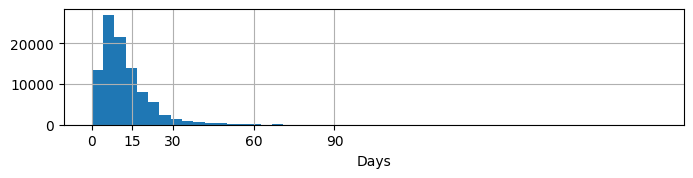

In [149]:
delivery_duration = dfs["orders"]["order_delivered_customer_date"] - dfs["orders"]["order_purchase_timestamp"]

ax = delivery_duration.dt.days.hist(bins= 50, figsize=(8,1.5))
_ = ax.set_xlabel("Days")
_ = ax.set_xticks([0,15,30,60,90])

In [150]:
print("Preview:")
display(delivery_duration[0:3])
display(delivery_duration.describe())

Preview:


0    8 days 10:28:40
1   13 days 18:46:08
2    9 days 09:27:40
dtype: timedelta64[ns]

count                         96461
mean     12 days 13:23:46.585853350
                    ...            
75%                15 days 17:17:10
max               209 days 15:05:12
Length: 8, dtype: object

### Delivery accuracy

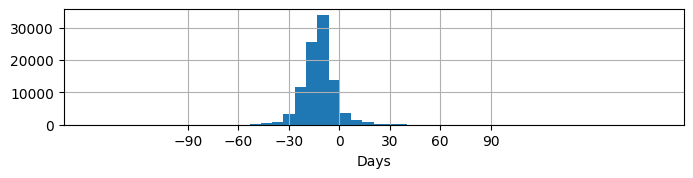

In [151]:
delivery_accuracy = dfs["orders"]["order_delivered_customer_date"] - dfs["orders"]["order_estimated_delivery_date"]

ax = delivery_accuracy.dt.days.hist(bins= 50, figsize= (8,1.5))
_ = ax.set_xlabel("Days")
_ = ax.set_xticks([-90,-60,-30,0,30,60,90])

In [152]:
print("Preview:")
display(delivery_accuracy[39:42])
display(delivery_accuracy.describe()) #The min and max here are huge

Preview:


40   -12 days +13:58:46
41      7 days 18:59:23
42   -20 days +14:08:40
dtype: timedelta64[ns]

count                           96461
mean     -12 days +19:43:58.992090068
                     ...             
75%                 -7 days +14:39:25
max                 188 days 23:24:07
Length: 8, dtype: object

### Delivery timeliness

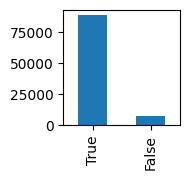

In [153]:
delivery_on_time = delivery_accuracy <= pd.Timedelta(0)

ax = delivery_on_time.value_counts().plot(kind= "bar", figsize= (1.5,1.5))

In [154]:
print("Preview:")
display(delivery_on_time[39:42])
display(delivery_on_time.value_counts())

Preview:


40     True
41    False
42     True
dtype: bool

True     88635
False     7826
Name: count, dtype: int64

### Order totals

#### Aggregation

In [155]:
grouped_orders = dfs["order_items"].groupby(by= "order_id")
aggregated_orders = grouped_orders[["price", "freight_value"]].sum().reset_index()
order_totals = aggregated_orders["price"] + aggregated_orders["freight_value"]
aggregated_orders["order_total"] = order_totals # Optional: append column to aggregated_orders

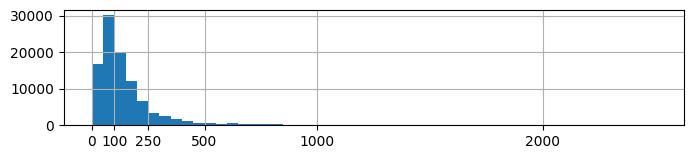

(totals capped at 2500 -- higher values exist)


In [156]:
ax = order_totals.hist(bins=50, figsize= (8,1.5), range=(0,2500))
_ = ax.set_xticks([0,100,250,500,1000,2000])
mpp.show()
print("(totals capped at 2500 -- higher values exist)")

In [157]:
print("Preview:")
display(aggregated_orders[100:104])
display(aggregated_orders.describe())

Preview:


order_id  price  freight_value  order_total
100  003f201cdd39cdd59b6447cff2195456  170.0          34.06       204.06
101  003f9bcc09427647c4b9d361a523545b  229.0           9.80       238.80
102  00404fa7a687c8c44ca69d42695aae73   99.9           0.00        99.90
103  0040a56893444cb56cba7cfe2225e34e   84.9          34.39       119.29

price  freight_value   order_total
count  98666.000000   98666.000000  98666.000000
mean     137.754076      22.823562    160.577638
...             ...            ...           ...
75%      149.900000      24.040000    176.870000
max    13440.000000    1794.960000  13664.080000

[8 rows x 3 columns]

#### + Explanation (steps)

In [158]:
print("One step at a time:")
print("_"*70)


print("1. Orders without aggregation:\n")
slice_grouped_orders = dfs["order_items"][100:104].groupby(by= "order_id")[["order_item_id", "price", "freight_value"]]
# This DataFrameGroupBy object contains name, group (like a dict)

for n, g in slice_grouped_orders:
    print("order_id", n)
    display(g)
print("_"*70)


print("2. Orders, summing subtotals:\n")
slice_aggregated_orders = slice_grouped_orders.sum()[["price", "freight_value"]].reset_index()
slice_order_totals = slice_aggregated_orders["price"] + slice_aggregated_orders["freight_value"]
display(slice_aggregated_orders)
print("_"*70)

print("3. Orders with totals:\n")
slice_aggregated_orders["order_total"] = slice_order_totals
display(slice_aggregated_orders)
print("_"*70)

One step at a time:
______________________________________________________________________
1. Orders without aggregation:

order_id 00378c6c981f234634c0b9d6128df6dd


order_item_id  price  freight_value
100              1   41.0          11.85

order_id 003822434f91204da0a51fe4cf2aba18


order_item_id  price  freight_value
101              1   69.0          18.58
102              2   69.0          18.58

order_id 0039500db36d50d7d0bfaf23723550f3


order_item_id  price  freight_value
103              1  169.9          33.33

______________________________________________________________________
2. Orders, summing subtotals:



order_id  price  freight_value
0  00378c6c981f234634c0b9d6128df6dd   41.0          11.85
1  003822434f91204da0a51fe4cf2aba18  138.0          37.16
2  0039500db36d50d7d0bfaf23723550f3  169.9          33.33

______________________________________________________________________
3. Orders with totals:



order_id  price  freight_value  order_total
0  00378c6c981f234634c0b9d6128df6dd   41.0          11.85        52.85
1  003822434f91204da0a51fe4cf2aba18  138.0          37.16       175.16
2  0039500db36d50d7d0bfaf23723550f3  169.9          33.33       203.23

______________________________________________________________________


#### + Oddities

##### 1. The orders table is not synced with the order_items table.

In [159]:
# The newly calculated version has 2205 more orders
print("Orders inferred from order_items:", len(aggregated_orders))
print("Orders recorded in the database:", len(dfs["orders"]))

Orders inferred from order_items: 98666
Orders recorded in the database: 96461


In [160]:
#(This has a value of ~0.5 M$)
order_id_diff1 = set(dfs["orders"]["order_id"]) ^ set(aggregated_orders["order_id"])

print("This mistake failed to account for", round(aggregated_orders [aggregated_orders["order_id"].isin(order_id_diff1)] ["order_total"].sum(),2),"$")
display(aggregated_orders [aggregated_orders["order_id"].isin(order_id_diff1)])

order_id_diff2 = set(dfs["order_reviews"]["order_id"]) ^ set(aggregated_orders["order_id"])

print("This mistake failed to account for", round(aggregated_orders [aggregated_orders["order_id"].isin(order_id_diff2)] ["order_total"].sum(),2),"$")
display(aggregated_orders [aggregated_orders["order_id"].isin(order_id_diff2)])

This mistake fails to account for 426558.41 $


order_id  price  freight_value  order_total
72     002f19a65a2ddd70a090297872e6d64e  53.98          23.31        77.29
76     00310b0c75bb13015ec4d82d341865a4  39.90          15.38        55.28
...                                 ...    ...            ...          ...
98429  ff536d93ae4214b4d51c2894ccfc569f  39.00           8.27        47.27
98464  ff7140ba310a4717112d39c0cd0b4062  70.00          16.93        86.93

[2205 rows x 4 columns]

This mistake fails to account for 143707.63 $


order_id  price  freight_value  order_total
31     00143d0f86d6fbd9f9b38ab440ac16f5  63.99          45.30       109.29
80     00335b686d693c7d72deeb12f8e89227  63.90          16.89        80.79
...                                 ...    ...            ...          ...
98441  ff5b7f440481674b38554434638beebf  94.90          15.73       110.63
98607  ffdb12bf66b3d0145d09d962745a05f6  32.99          15.10        48.09

[749 rows x 4 columns]

In [161]:
# Remediation: Ignore extra rows (the data is not retrievable due to schema design choices)
aggregated_orders = aggregated_orders [~aggregated_orders["order_id"].isin(order_id_diff)]

# Remember the ids with reviews
order_ids_with_totals = set(aggregated_orders["order_id"])

print("Retained totals:", len(order_ids_with_totals))

Retained totals: 98666


##### 2. This is true for order_reviews as well.

In [162]:
# Reviews for each order
grouped_orders2 = dfs["order_reviews"].groupby(by= "order_id")
review_scores = grouped_orders2["review_score"].mean().reset_index()

# The newly calculated version has ~800 more orders
print("Reviewed orders recorded in the database:", len(dfs["order_reviews"]))
print("Reviewed orders inferred from order_items:", len(review_scores))

Reviewed orders recorded in the database: 99224
Reviewed orders inferred from order_items: 98673


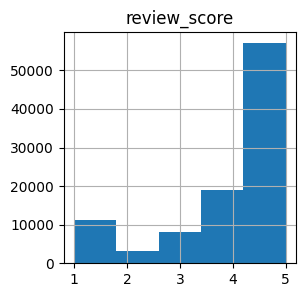

In [163]:
# Histogram
ax = review_scores.hist(bins=5, figsize= (3, 3), range=(1, 5))

##### 3. There are likely others... This was not relevant for the analysis.

Suggestion: The schema should be revised to propagate updates, require less cleaning, and involve simpler subqueries (for instance, PRIMARY and FOREIGN keys would have consistant logic)

### Average freight value

In [164]:
average_freight_value = round(aggregated_orders["freight_value"].mean(),2)
print(average_freight_value, "$")

22.82 $


## Part 3 - Table enriching/transformation

### Delivery quality

#### Picking features

Available, relevant, anonymized features subject to analysis:

    order_id
    order_status
    order_total
    
    seller_id
    delivery_on_time
    delivery_accuracy
    delivery_duration
    
    review_score
    
    customer_id
    customer_zip_code_prefix
    customer_city

#### Retrieving features

In [165]:
# Preparing tables with relevant features for a future merge on "order_id"
# Feature: order_id
# OK

# Feature: order_status
os = dfs["orders"][["order_id", "order_status"]]

# Feature: order_total
ot = aggregated_orders[["order_id", "order_total"]]

# Feature: delivery_duration
dd = pd.concat([dfs["orders"]["order_id"], delivery_duration], axis= 1)
dd.columns = ["order_id", "delivery_duration"]

# Feature: delivery_accuracy
da = pd.concat([dfs["orders"]["order_id"], delivery_accuracy], axis= 1)
da.columns = ["order_id", "delivery_accuracy"]

# Feature: delivery_on_time
dot = pd.concat([dfs["orders"]["order_id"], delivery_on_time], axis= 1)
dot.columns = ["order_id", "delivery_on_time"]

# Feature: review_score
grouped_orders2 = dfs["order_reviews"].groupby(by= "order_id")
rs = grouped_orders2["review_score"].mean().reset_index()

# Features: customer_id, customer_city, customer_zip_code_prefix
grouped_orders3 = dfs["orders"].groupby(by= "order_id")
c_ = grouped_orders3["customer_id"].agg("first").reset_index()
c_ = c_.merge(dfs["customers"][["customer_id", "customer_zip_code_prefix", "customer_city"]], on= "customer_id")

# Feature: seller_id
grouped_orders4 = dfs["order_items"].groupby(by= "order_id")
si = grouped_orders4["seller_id"].agg("first").reset_index()

#### Populating the table

In [166]:
# Merging on "order_id" (inner join -- common order_ids kept)
delivery_quality = os.merge(ot, on= "order_id").merge(si, on= "order_id").merge(dd, on= "order_id").merge(da, on= "order_id").merge(dot, on= "order_id").merge(rs, on= "order_id").merge(c_, on= "order_id")

display(delivery_quality)

order_id order_status  order_total  \
0      e481f51cbdc54678b7cc49136f2d6af7    delivered        38.71   
1      53cdb2fc8bc7dce0b6741e2150273451    delivered       141.46   
...                                 ...          ...          ...   
95813  11c177c8e97725db2631073c19f07b62    delivered       441.16   
95814  66dea50a8b16d9b4dee7af250b4be1a5    delivered        86.86   

                              seller_id delivery_duration  delivery_accuracy  \
0      3504c0cb71d7fa48d967e0e4c94d59d9   8 days 10:28:40  -8 days +21:25:13   
1      289cdb325fb7e7f891c38608bf9e0962  13 days 18:46:08  -6 days +15:27:45   
...                                 ...               ...                ...   
95813  a1043bafd471dff536d0c462352beb48  17 days 02:04:27 -21 days +23:32:54   
95814  ececbfcff9804a2d6b40f589df8eef2b   7 days 16:11:00 -18 days +13:08:30   

       delivery_on_time  review_score                       customer_id  \
0                  True           4.0  9ef432eb6251297304e76186b10a928d   
1                  True           4.0  b0830fb4747a6c6d20dea0b8c802d7ef   
...                 ...           ...                               ...   
95813              True           2.0  b331b74b18dc79bcdf6532d51e1637c1   
95814              True           5.0  edb027a75a1449115f6b43211ae02a24   

      customer_zip_code_prefix customer_city  
0                         3149     sao paulo  
1                        47813     barreiras  
...                        ...           ...  
95813                    28685       japuiba  
95814                    83750          lapa  

[95815 rows x 11 columns]

## Part 4 - Addressing questions

### Overall satisfaction

Average rating: 4.2


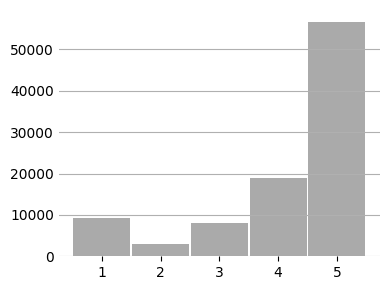

In [167]:
sat_data = delivery_quality["review_score"]
# Average rating
review_score_avg = round(sat_data.mean(), 1)
print("Average rating:", review_score_avg)

# Total reviews
# mpp.figure(figsize= (4,3)) # Investigate: here, figsize different than subplots()
fig, ax = mpp.subplots(figsize= (4,3))
ax.hist(sat_data, bins= [1, 2, 3, 4, 5, 6], color= "#AAAAAA", rwidth= 0.97, align= "left")
ax.set_xticks([1, 2, 3, 4, 5])
ax.grid(axis= "y")
ax.tick_params(axis='y', which='both', length=0)
ax.set_frame_on(False)

mpp.tight_layout()
mpp.show()

# # Histogram
# mpp.figure()
# ax = sat_data.hist(bins=5, figsize= (3, 3), range=(1, 5))
# mpp.show()

### Delays vs. satisfaction

#### "Does it really matter?"

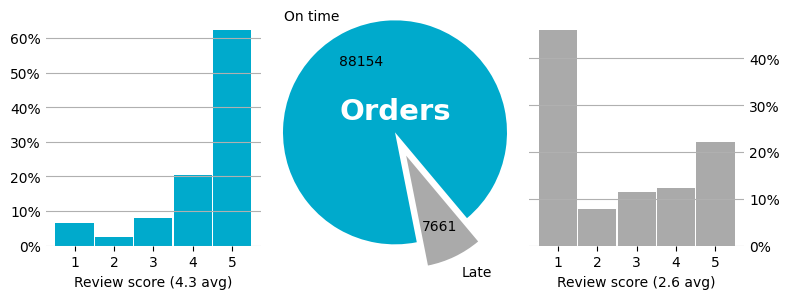

In [168]:
# Plotting data
spA_data = delivery_quality["delivery_on_time"].value_counts()
spB_data = delivery_quality["review_score"] [delivery_quality["delivery_on_time"] == True]
spC_data = delivery_quality["review_score"] [delivery_quality["delivery_on_time"] == False]

# Figure
fig, subplots = mpp.subplot_mosaic("""
BAC
""",figsize = (8,3))

# Subplot A. Deliveries: On time / Late
subplots["A"].pie(spA_data.values,
                  radius= 1.3,
                  colors= ["#00AACC", "#AAAAAA"],
                  autopct= lambda pct: f'{int(round(pct/100 * sum(spA_data)))}',
                  pctdistance= 0.7,
                  labels= ["On time", "Late"],
                  labeldistance= 1.15,
                  startangle= 310,
                  explode= [0, 0.3])
subplots["A"].text(x= 0,
                   y= 0.25,
                   ha= 'center',
                   va= 'center',
                   s= "Orders",
                   color= 'white',
                   size= 21,
                   weight= 'bold')

# Subplot B. Reviews: On time
subplots["B"].hist(spB_data, density= True, bins= [1, 2, 3, 4, 5, 6], color= "#00AACC",rwidth= 0.97, align= "left")
subplots["B"].set_xticks([1, 2, 3, 4, 5])
# subplots["B"].set_ylim([0, 1])
subplots["B"].yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax= 1.0, decimals= 0))
subplots["B"].grid(axis= "y")
subplots["B"].tick_params(axis='y', which='both', length=0)
subplots["B"].set_frame_on(False)
subplots["B"].set_xlabel(f"Review score ({spB_data.mean().round(1)} avg)")

# Subplot C. Reviews: Late
subplots["C"].hist(spC_data, density= True, bins= [1, 2, 3, 4, 5, 6], color= "#AAAAAA", rwidth= 0.97, align= "left")
subplots["C"].set_xticks([1, 2, 3, 4, 5])
# subplots["C"].set_ylim([0, 1])
subplots["C"].yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax= 1.0, decimals= 0))
subplots["C"].grid(axis= "y")
subplots["C"].tick_params(axis='y', which='both', length=0)
subplots["C"].yaxis.tick_right()
subplots["C"].set_frame_on(False)
subplots["C"].set_xlabel(f"Review score ({spC_data.mean().round(1)} avg)")

mpp.tight_layout()
mpp.show()

#### "Can it be controlled?"

In [169]:
# Prepping data (binning delivery delays)
boxplot_data = delivery_quality[["review_score", "delivery_duration", "delivery_on_time"]].copy()
boxplot_data["delivery_duration_days"] = delivery_quality["delivery_duration"].dt.days
boxplot_data["delivery_duration_days"] = pd.cut(x= boxplot_data["delivery_duration_days"],
                                              bins= [0, 7.5, 15, 22.5, 30, 60, 90, float('inf')],
                                              labels= ["0-1 wk", "1-2 wks", "2-3 wks", "3-4 wks", "1-2 mo", "2-3 mo", ">"],
                                              right= False)

# Prepping data (binning delivery accuracies)
boxplot2_data = delivery_quality[["review_score", "delivery_accuracy", "delivery_on_time"]].copy()
boxplot2_data["delivery_accuracy_days"] = delivery_quality["delivery_accuracy"].dt.days
boxplot2_data["delivery_accuracy_days"] = pd.cut(x= boxplot2_data["delivery_accuracy_days"],
                                              bins= [-float('inf'), #-90, -60, -30, -22.5, -15, -7.5,
                                                     0, 1, 2, 3, 4, 5, 6, 7, 15, 22.5, 30, 60, 90, float('inf')],
                                              labels= ["<", #"-3 mo", "-2 mo", "-1 mo", "-3 wks", "-2 wks", "-1 wk",
                                                       "1 d", "2 d", "3 d", "4 d", "5 d", "6 d", "7 d", "2 wk", "3 wk", "4 wk", "2 mo", "3 mo", ">"],
                                              right= False)

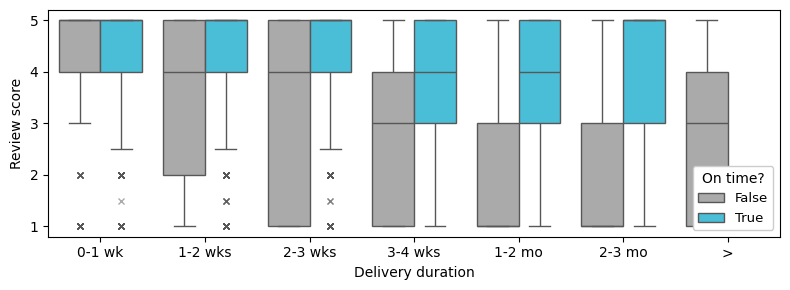

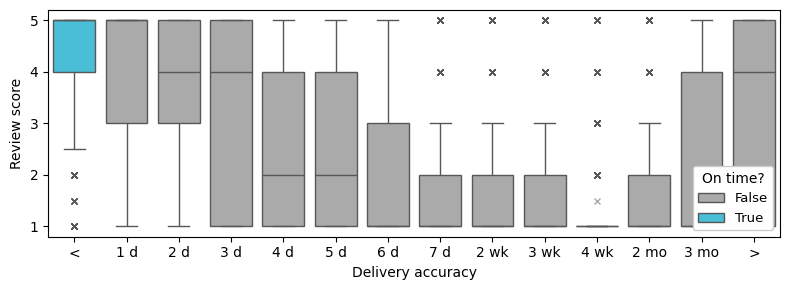

In [170]:
# Box plot 1: Delivery durations & review scores (categories: on time / not on time)
mpp.figure(figsize= (8,3))

sb.boxplot(data= boxplot_data,
           x="delivery_duration_days",
           y= "review_score",
           hue= "delivery_on_time",
           palette= ["#AAAAAA", "#33CCEE"],
           flierprops= dict(marker= 'x', markersize= 5, alpha= 0.5))

mpp.xlabel("Delivery duration")
mpp.ylabel("Review score")
mpp.legend(title= "On time?", loc= "lower right", fontsize= 9.5, framealpha= 1)

mpp.tight_layout()
mpp.show()

# Box plot 2: Delivery accuracies & review scores (categories: on time / not on time)
mpp.figure(figsize= (8,3))

sb.boxplot(data= boxplot2_data,
           x="delivery_accuracy_days",
           y= "review_score",
           hue= "delivery_on_time",
           palette= ["#AAAAAA", "#33CCEE"],
           flierprops= dict(marker= 'x', markersize= 5, alpha= 0.5))

mpp.xlabel("Delivery accuracy")
mpp.ylabel("Review score")
mpp.legend(title= "On time?", loc= "lower right", fontsize= 9.5, framealpha= 1)

mpp.tight_layout()
mpp.show()

#### "So... what to do now?"

Insights:

* Customers don't mind delivery **durations of up to 3 wks**
* Customers do mind delivery **delays of as little as 3 days**


Possible actions:

* For deliveries doable in 3 wks or less, consider **underpromising (up to 3 wks)**
* For contingencies, cap this target earlier (example: a 2wk delivery announced as taking at most 3wks less 3days)

### Delays across cities

In [171]:
# Getting reliability data per city
city_delay_data = delivery_quality[["delivery_duration", "delivery_accuracy", "delivery_on_time", "customer_city"]].groupby("customer_city").agg(
    delivery_duration= ("delivery_duration", "mean"),
    delivery_accuracy= ("delivery_accuracy", "mean"),
    delivery_on_time= ("delivery_on_time", "mean")
).reset_index()

# Cleaning / formatting
city_delay_data["delivery_duration"] = pd.to_timedelta(city_delay_data["delivery_duration"]).dt.round('s') # rounding back to seconds
city_delay_data["delivery_accuracy"] = pd.to_timedelta(city_delay_data["delivery_accuracy"]).dt.round('s') # rounding back to seconds
city_delay_data["delivery_on_time"] = pd.to_numeric(city_delay_data["delivery_on_time"]).round(2) # here, delivery_on_time is no longer Trues / Falses, but rather per product proportions of Trues

# Sorting
city_delay_data = city_delay_data.sort_values(["delivery_on_time", "delivery_duration", "delivery_accuracy"], ascending = [True, False, False])

# Appending state, lat, long
geo_data = dfs["geolocations"][["geolocation_city", "geolocation_lat", "geolocation_lng", "geolocation_state"]].groupby("geolocation_city").agg(
    city_lat=    ("geolocation_lat", "mean"),
    city_long=   ("geolocation_lng", "mean"),
    city_state=  ("geolocation_state", "last")
).reset_index()

geo_data.rename(columns = {"geolocation_city": "customer_city"}, inplace= True)

city_delay_data = city_delay_data.merge(geo_data, on= "customer_city", how="left")

#Retrieve accrued value per city (for marker size)
city_accrued_totals = delivery_quality[["order_total", "customer_city"]].groupby("customer_city").sum().sort_values(by= "order_total", ascending= False).reset_index()
city_accrued_totals["order_total_minmax"] = MinMaxScaler().fit_transform(city_accrued_totals[["order_total"]]).round(5)
city_accrued_totals["order_total"] = city_accrued_totals["order_total"].round(0).apply(int)
city_delay_data = pd.merge(city_delay_data, city_accrued_totals[["customer_city", "order_total"]], on= "customer_city", how= "left") # also copy order_total to the primary, clean df

# Dropping NAs resulting from merging (~50 small town latlongs aren't listed correctly between 2 tables in the database)
print(len(city_delay_data))
city_delay_data.dropna(inplace= True)
print(len(city_delay_data))

# Dropping the same cities from the accrued values table
print(len(set(city_accrued_totals["customer_city"]) ^ set(city_delay_data["customer_city"])))
city_accrued_totals = city_accrued_totals[city_accrued_totals["customer_city"].isin(city_delay_data["customer_city"])].copy()
print(len(set(city_accrued_totals["customer_city"]) ^ set(city_delay_data["customer_city"])))

display(city_delay_data)

4083
4035
48
0


customer_city delivery_duration  delivery_accuracy  \
0           novo brasil 148 days 04:11:17  126 days 16:41:56   
1     capinzal do norte 109 days 01:48:02   78 days 18:53:47   
...                 ...               ...                ...   
4080            acucena   3 days 17:28:28 -18 days +08:43:52   
4082             iomere   2 days 23:14:48 -12 days +20:10:58   

      delivery_on_time  city_lat  city_long city_state  order_total  
0                  0.0   -17.984    -44.534         GO          104  
1                  0.0    -4.704    -44.330         MA          461  
...                ...       ...        ...        ...          ...  
4080               1.0   -19.240    -42.836         MG           54  
4082               1.0   -27.000    -51.245         SC           64  

[4035 rows x 8 columns]

In [172]:
# View city reliabilities on a folium map

# Write states, cities and coordinates in a global dictionary: states_city_location
tmp_df = city_delay_data[["city_state", "customer_city", "city_lat", "city_long", "delivery_on_time"]]
states_city_location = {}
for state, group_df in tmp_df.groupby('city_state'):
    states_city_location[state] = group_df.set_index('customer_city')[['city_lat', 'city_long', 'delivery_on_time']].to_dict(orient='index')
    # Usage:
    # Get a city's latitude:
    # states_city_location["AC"]["campinas"]["city_lat"]
    # Get a city's location:
    # states_city_location["AC"]["campinas"].values()
    # Get a state's cities:
    # list( states_city_location["AC"].keys() )

# Compute the average order location (optional)
all_latitudes = []
all_longitudes = []
    
for city in states_city_location.values():
    for coords in city.values():
        all_latitudes.append(coords['city_lat'])
        all_longitudes.append(coords['city_long'])
        
avg_lat = sum(all_latitudes) / len(all_latitudes) # avg_lat = dfs["geolocations"]["geolocation_lat"].mean()
avg_long = sum(all_longitudes) / len(all_longitudes) # avg_long = dfs["geolocations"]["geolocation_lng"].mean()

# Basic map
m = folium.Map(location= [avg_lat, avg_long], zoom_start=4.3)

# Draw the average order location (optional)
# folium.Marker(location= [avg_lat, avg_long],
#               popup= "Average Order Location").add_to(m)

# City markers, clustered by state (cities show: reliability, accrued value)
for state in states_city_location.keys():
    mc = MarkerCluster(name= state, maxClusterRadius= 2000, disableClusteringAtZoom=3, tooltip= state).add_to(m)
    for city in states_city_location[state]:
        marker = folium.CircleMarker(location= [states_city_location[state][city]["city_lat"],
                                                states_city_location[state][city]["city_long"]],
                                     
                                     tooltip= f"{city.title()} ({round(states_city_location[state][city]["delivery_on_time"] * 100)}% reliable)",
                                     popup= f"{city.title()} accrued {city_accrued_totals["order_total"] [city_accrued_totals["customer_city"] == city].iloc[0]} $",
                                     
                                     radius= 3.5 * ((city_accrued_totals["order_total_minmax"] [city_accrued_totals["customer_city"] == city].iloc[0]) * 3) + 1,
                                     fill= True,
                                     fill_opacity= (1 - states_city_location[state][city]["delivery_on_time"] * 0.3),
                                     fill_color= f"rgb({int((1 - states_city_location[state][city]["delivery_on_time"]) * 255)}, {int((states_city_location[state][city]["delivery_on_time"])*255)}, 0)",
                                     
                                     stroke= True,
                                     opacity= (1 - states_city_location[state][city]["delivery_on_time"] * 0.3),
                                     color= "black",
                                     weight= 0.21
                                    ).add_to(mc) # add to mc (clustering) or m (no clustering -- lower the opacity in this case)

# States as layers
folium.LayerControl().add_to(m)

# Draw
m

#### "Does it really matter"?

In [173]:
# Financial "weight" of cities, shown according to their unreliability
city_potentials = delivery_quality[["delivery_on_time", "order_total", "customer_city"]].groupby("customer_city").agg(
    delivery_on_time = ("delivery_on_time", "mean"),
    order_total = ("order_total", "sum")
).sort_values(by= "order_total", ascending= False).reset_index()

# Money wasted from unsuccessful deliveries (to each city)
city_potentials["money_on_the_table"] = ( city_potentials["order_total"] * (1/city_potentials["delivery_on_time"] - 1) ).round(2) # (order_total / reliability ) - order_total = tot (1/rel - 1) = tot (1/rel - rel/rel) = tot (1-rel) / rel
city_potentials["money_on_the_table"] = city_potentials["money_on_the_table"].replace(float('inf'), 0) # cities never delivered to are assigned a potential of 0
city_potentials["money_on_the_table_percent"] = ( 100 * city_potentials["money_on_the_table"] / (city_potentials["order_total"].sum()) ).round(5)
city_potentials.sort_values(by= "money_on_the_table", ascending = False, inplace= True)

# Total money to be gained by fully fixing unreliability:
print("-"*75)
print("Money on the table (a full correction of all reliabilites worldwide would amount to):")
print(
    city_potentials["money_on_the_table"].sum().round(), "$",
    "(which is",
    city_potentials["money_on_the_table_percent"].sum().round(),"%",    
    "of company capital)")

display(city_potentials.head())

---------------------------------------------------------------------------
Money on the table (a full correction of all reliabilites worldwide would amount to):
1449242.0 $ (which is 9.0 % of company capital)


customer_city  delivery_on_time  order_total  money_on_the_table  \
1  rio de janeiro          0.883190   1095860.27           144936.97   
0       sao paulo          0.938177   2096047.53           138122.09   
7        salvador          0.830205    205654.53            42060.90   
5    porto alegre          0.883895    213099.60            27991.90   
3        brasilia          0.928675    343842.32            26407.95   

   money_on_the_table_percent  
1                     0.94801  
0                     0.90343  
7                     0.27511  
5                     0.18309  
3                     0.17273

---------------------------------------------------------------------------
Order value of cities by 10% reliability bins:
---------------------------------------------------------------------------
Below or 0 % reliability: 	Order total in question: 21435.96 $ 	(Cumulative contribution: 0.0 %)
Below or 10 % reliability: 	Order total in question: 21435.96 $ 	(Cumulative contribution: 0.0 %)
Below or 20 % reliability: 	Order total in question: 21435.96 $ 	(Cumulative contribution: 0.0 %)
Below or 30 % reliability: 	Order total in question: 22774.27 $ 	(Cumulative contribution: 0.0 %)
Below or 40 % reliability: 	Order total in question: 32552.49 $ 	(Cumulative contribution: 0.0 %)
Below or 50 % reliability: 	Order total in question: 71341.05 $ 	(Cumulative contribution: 0.0 %)
Below or 60 % reliability: 	Order total in question: 89494.53 $ 	(Cumulative contribution: 1.0 %)
Below or 70 % reliability: 	Order total in question: 158441.03 $ 	(Cumulative contribution: 1.0 %)
Below or 80 % rel

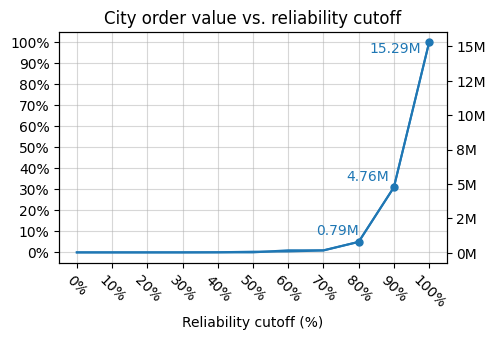

In [174]:
# City reliability threshold vs. order value
# Printed out
tmp_list = []
print("-"*75)
print("Order value of cities by 10% reliability bins:")
print("-"*75)
for reliability_threshold in range(0, 11):
    reliability_threshold = reliability_threshold / 10
    
    tmp_list.append({"percent_max_reliability": int(round(reliability_threshold * 100, 0)),
                     "weight_cities_unreliable": city_potentials["order_total"] [city_potentials["delivery_on_time"] <= reliability_threshold].sum().round(2),
                     "percent_weight_cities_unreliable": (city_potentials["order_total"] [city_potentials["delivery_on_time"] <= reliability_threshold].sum() / city_potentials["order_total"] [city_potentials["delivery_on_time"] <= 1.0].sum()).round(2) * 100})
    
    print("Below or", int(round(reliability_threshold * 100, 0)), "% reliability:",
          "\tOrder total in question:", city_potentials["order_total"] [city_potentials["delivery_on_time"] <= reliability_threshold].sum().round(2), "$",
          "\t(Cumulative contribution:", (((city_potentials["order_total"] [city_potentials["delivery_on_time"] <= reliability_threshold].sum() / city_potentials["order_total"] [city_potentials["delivery_on_time"] <= 1.0].sum()).round(3) * 100).round(0)), "%)")

# As a graph
mpp.figure(figsize= (5, 3))
_ = pd.DataFrame(tmp_list).set_index("percent_max_reliability")["percent_weight_cities_unreliable"].plot(title= "City order value vs. reliability cutoff")
mpp.grid(alpha= 0.5)
mpp.xlabel("Reliability cutoff (%)")
# mpp.ylabel("Order value")

_.set_xticks([x for x in range(0, 101, 10)], labels= [f'{x}%' for x in range(0, 101, 10)])
_.tick_params(axis='x', labelrotation= -45)

_yticks = _.get_yticks()[1:-1]
# _.set_yticks(_yticks, labels=[f'{round(t)}%' for t in _yticks])
_.set_yticks([y for y in range(0, 101, 10)], labels= [f'{y}%' for y in range(0, 101, 10)])

__ = mpp.twinx()
__line2D, = __.plot(pd.DataFrame(tmp_list)["percent_max_reliability"], pd.DataFrame(tmp_list)["weight_cities_unreliable"])
__.ticklabel_format(style='plain', axis='y')
__yticks = __.get_yticks()[1:-1] #Trimmed extrema to align with the % axis
__.set_yticks(__yticks, labels=[f'{round(t/1000000)}M' for t in __yticks])

__.plot(__line2D.get_xdata()[8], __line2D.get_ydata()[8], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[8] * 0.85, __line2D.get_ydata()[8] * 1.7, f'{round(__line2D.get_ydata()[8]/1000000, 2)}M', fontsize=10, color='#1f77b4')

__.plot(__line2D.get_xdata()[9], __line2D.get_ydata()[9], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[9] * 0.85, __line2D.get_ydata()[9] * 1.1, f'{round(__line2D.get_ydata()[9]/1000000, 2)}M', fontsize=10, color='#1f77b4')

__.plot(__line2D.get_xdata()[10], __line2D.get_ydata()[10], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[10] * 0.83, __line2D.get_ydata()[10] * 0.95, f'{round(__line2D.get_ydata()[10]/1000000, 2)}M', fontsize=10, color='#1f77b4')

mpp.show()

---------------------------------------------------------------------------
Top 10 cities, sorted by gain to be made by reaching 100% reliability:


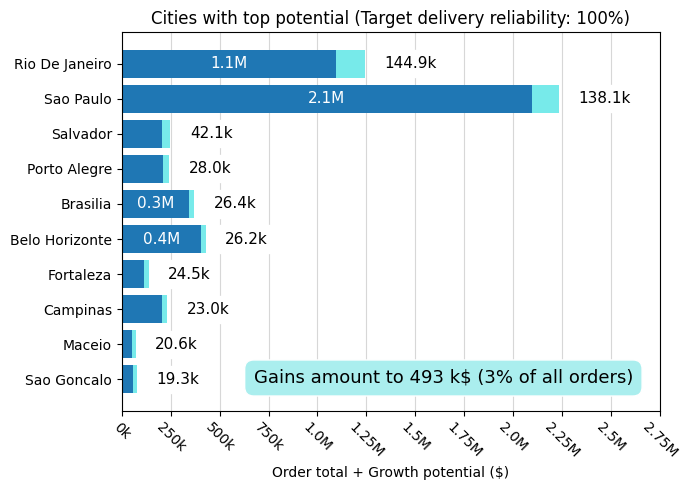

In [175]:
# Top 10 descending cities, by gains made by fixing unreliability
# (metric: (100% - reliability) * city order value)
print("-"*75)
print("Top 10 cities, sorted by gain to be made by reaching 100% reliability:")

# Top 10 worthwhile cities as a graph
fig, _ = mpp.subplots(figsize= (7,5))
mpp.title("Cities with top potential (Target delivery reliability: 100%)")

bars1 = _.barh([s.title() for s in city_potentials["customer_city"].head(10)], city_potentials["order_total"].head(10), color= "#1f77b4", zorder= 2)
bars2 = _.barh([s.title() for s in city_potentials["customer_city"].head(10)], city_potentials["money_on_the_table"].head(10), left= city_potentials["order_total"].head(10), color= "#77EAEA", zorder= 2)

mpp.xlabel("Order total + Growth potential ($)")
mpp.xticks(range(0, int(max(city_potentials["order_total"].head(10) + city_potentials["money_on_the_table"].head(10))*1.3), 250000))
# _.set_xticks(_.get_xticks(), labels=[f'{int(round(t/1000, 0))}k' for t in _.get_xticks()])
# _.set_xticks(_.get_xticks(), labels=[f'{round(t/1000000, 2)}M' for t in _.get_xticks()])
_.set_xticks(_.get_xticks(), labels= [f'{round(t/1000000, 2)}M' if t >= 1000000 else f'{int(round(t/1000, 0))}k' for t in _.get_xticks()])
_.tick_params(axis='x', labelrotation= -45)
mpp.gca().invert_yaxis()

_.text(
    x= 0.95, y= 0.11,
    s= f'Gains amount to {int((city_potentials["money_on_the_table"].head(10).sum()/1000).round())} k$ ({int(city_potentials["money_on_the_table_percent"].head(10).sum().round())}% of all orders)',
    ha= 'right', va= 'top',
    transform=_.transAxes,
    fontsize= 13,
    bbox= dict(
        boxstyle= 'round, pad= 0.5',
        facecolor= '#AAEEEE',
        edgecolor= 'white',
        alpha= 1
    )
)

[_.text(
    bar.get_width()/2,
    bar.get_y() + bar.get_height() / 2,
    f'{(bar.get_width()/1000000).round(1)}M',
    ha='center',
    va='center',
    color='white',
    fontsize=11
    )
 for bar in bars1 if bar.get_width() > 250000]

[_.text(
    bar.get_x() + bar.get_width() + 100000, 
    bar.get_y() + bar.get_height() / 2,
    f'{(bar.get_width()/1000).round(1)}k',
    ha='left',
    va='center',
    color='black',
    fontsize=11,
    bbox= dict(
        boxstyle= 'square, pad= 0.4',
        facecolor= 'white',
        edgecolor= 'white',
        alpha= 1
    )
    )
 for bar in bars2 if bar.get_width() > 15000]

mpp.grid(axis= "x", zorder= 1, alpha= 0.5)
mpp.tight_layout()
mpp.show()

#### "Can it be controlled?"

#### "So... what to do now?"

**Overall, it's not financially worth correcting the unreliability of cities below 80% reliability.**

**Even then, fixing all (even non-top-10) cities would only return 1,26M$ (8.0 % of company capital).**

If considering improvement initiatives regardless, these are helpful remarks:

- The lowest hanging fruits are RDJ, Porto Alegre, and Salvador (83%-88% reliabilities "only" -- least effort)
- Sao Paulo and RDJ account for the most gains

So, RDJ is the #1 candidate for delivery improvement initiatives.

<!-- ** On the map, this is visible as:
"all red cities being desirably tiny, all large cities being a vibrant green".

Note: This doesn't mean there's pressure to correct 90% ones either, because even a perfect correction would only incur a 10% gain. ** -->

### Delayed products

In [176]:
# Getting product delays (average seen in previous orders)
product_delay_data = dfs["order_items"].join(
    delivery_quality[["order_id", "delivery_duration", "delivery_accuracy", "delivery_on_time"]].set_index("order_id"),
    on= "order_id").groupby("product_id") [["seller_id", "delivery_duration", "delivery_accuracy", "delivery_on_time", "price", "freight_value"]].agg(
        seller_id = ("seller_id", "unique"), # assumption: products have a unique seller
        delivery_duration = ("delivery_duration", "mean"),
        delivery_accuracy = ("delivery_accuracy", "mean"),
        delivery_on_time = ("delivery_on_time", "mean"),
        order_total1 = ("price", "sum"),
        order_total2 = ("freight_value", "sum")
    ).reset_index()

# Dropping NAs resulting from merging (~900)
print(len(product_delay_data))
product_delay_data.dropna(inplace= True)
print(len(product_delay_data))

# Cleaning up and reformatting the aggregates
product_delay_data["order_total"] = product_delay_data["order_total1"] + product_delay_data["order_total2"] # computing delivery totals
product_delay_data.drop(columns=["order_total1", "order_total2"], inplace=True) # dropping helper columns
product_delay_data["seller_id"] = product_delay_data["seller_id"].str[0] # resolves: "unique" returns a list
product_delay_data["delivery_duration"] = pd.to_timedelta(product_delay_data["delivery_duration"]).dt.round('s') # rounding back to seconds
product_delay_data["delivery_accuracy"] = pd.to_timedelta(product_delay_data["delivery_accuracy"]).dt.round('s') # rounding back to seconds
product_delay_data["delivery_on_time"] = pd.to_numeric(product_delay_data["delivery_on_time"]).round(2) # here, delivery_on_time is no longer Trues / Falses, but rather per product proportions of Trues
# We can now find out that, e.g.,"this product was delivered on time 34% of the time"

# Sorting by delivery_on_time
product_delay_data = product_delay_data.sort_values(["delivery_on_time", "delivery_duration", "delivery_accuracy"], ascending = [True, False, False])
display(product_delay_data)

# Data verifications
print("Quick check: Are the products listed unique?")
print(len(product_delay_data["product_id"]) == len(product_delay_data["product_id"].unique()), "//", len(product_delay_data["product_id"]), "listed,", len(product_delay_data["product_id"].unique()), "unique.")

print("Quick check: Do all sellers only have one product?")
print(len(product_delay_data["product_id"]) == len(product_delay_data["seller_id"].unique()), "//", len(product_delay_data["seller_id"].unique()), "sellers,", len(product_delay_data["product_id"]), "products.")

32951
32066


product_id                         seller_id  \
7792   3bec03860f3782ef8993056e01b8229a  2a1348e9addc1af5aaa619b1a3679d6b   
23527  b75683e29689c1a989ae97883e8cad56  df683dfda87bf71ac3fc63063fba369d   
...                                 ...                               ...   
24120  bb8e7dea852be7eb17288af376b3b933  17a053fcb14bd219540cbde0df490be0   
13345  6742c031c6ff9b57e732163ac4ca368f  189ca3538ce9f920cacf0f982cbe223b   

      delivery_duration  delivery_accuracy  delivery_on_time  order_total  
7792  195 days 15:12:59  165 days 15:12:50               0.0       185.02  
23527 189 days 20:42:57  167 days 17:00:07               0.0        55.95  
...                 ...                ...               ...          ...  
24120   1 days 00:43:08 -14 days +13:52:47               1.0       211.96  
13345   1 days 00:32:04  -5 days +15:22:18               1.0        37.95  

[32066 rows x 6 columns]

Quick check: Are the products listed unique?
True // 32066 listed, 32066 unique.
Quick check: Do all sellers only have one product?
False // 2932 sellers, 32066 products.


In [177]:
# Showing unreliable products
product_reliability_bounds = [0.00, 0.99] # example: 30% to 75% is [0.30, 0.75]
product_unreliability_data = product_delay_data[(product_reliability_bounds[1] >= product_delay_data["delivery_on_time"]) & (product_delay_data["delivery_on_time"] >= product_reliability_bounds[0])]

print("Found", len(product_unreliability_data), "products (of", len(product_delay_data), "in total):")
display(product_unreliability_data)

Found 5081 products (of 32066 in total):


product_id                         seller_id  \
7792   3bec03860f3782ef8993056e01b8229a  2a1348e9addc1af5aaa619b1a3679d6b   
23527  b75683e29689c1a989ae97883e8cad56  df683dfda87bf71ac3fc63063fba369d   
...                                 ...                               ...   
26640  cec09725da5ed01471d9a505e7389d37  4d6d651bd7684af3fffabd5f08d12e5a   
31144  f1c7f353075ce59d8a6f3cf58f419c9c  37be5a7c751166fbc5f8ccba4119e043   

      delivery_duration  delivery_accuracy  delivery_on_time  order_total  
7792  195 days 15:12:59  165 days 15:12:50              0.00       185.02  
23527 189 days 20:42:57  167 days 17:00:07              0.00        55.95  
...                 ...                ...               ...          ...  
26640  11 days 04:54:39 -12 days +08:21:09              0.99      6285.01  
31144   9 days 17:33:29 -14 days +04:14:49              0.99     33316.76  

[5081 rows x 6 columns]

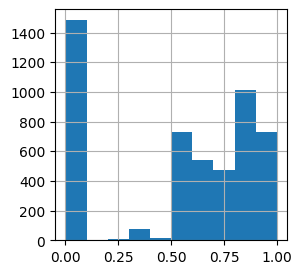

In [178]:
# Viz: Unreliable products (WIP)
fig, ax = mpp.subplots(figsize= (3,3))
product_unreliability_data["delivery_on_time"].hist(bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
mpp.show()

In [179]:
### Delays by seller

In [180]:
# Further aggregation from product_delay_data
seller_delay_data = product_delay_data.groupby("seller_id").agg(
        product_count = ("product_id", "nunique"),
        delivery_duration = ("delivery_duration", "mean"),
        delivery_accuracy = ("delivery_accuracy", "mean"),
        delivery_on_time = ("delivery_on_time", "mean")
    ).reset_index()

# Formatting
seller_delay_data["delivery_duration"] = pd.to_timedelta(seller_delay_data["delivery_duration"]).dt.round('s') # rounding back to seconds
seller_delay_data["delivery_accuracy"] = pd.to_timedelta(seller_delay_data["delivery_accuracy"]).dt.round('s') # rounding back to seconds
seller_delay_data["delivery_on_time"] = pd.to_numeric(seller_delay_data["delivery_on_time"]).round(2) # here, delivery_on_time is no longer a per product average, but a per seller "performance" factor
# We can now say, e.g., "this seller delivers on time 43% of the time"

# Sorting by delivery_on_time
seller_delay_data = seller_delay_data.sort_values(["delivery_on_time", "delivery_duration", "delivery_accuracy"], ascending = [True, False, False])
display(seller_delay_data)

seller_id  product_count delivery_duration  \
2562  df683dfda87bf71ac3fc63063fba369d              1 189 days 20:42:57   
1660  8e670472e453ba34a379331513d6aab1              1  86 days 00:01:41   
...                                ...            ...               ...   
1108  5e063e85d44b0f5c3e6ec3131103a57e              1   1 days 06:55:12   
221   139157dd4daa45c25b0807ffff348363              1   1 days 05:08:25   

      delivery_accuracy  delivery_on_time  
2562  167 days 17:00:07               0.0  
1660   35 days 17:09:10               0.0  
...                 ...               ...  
1108  -7 days +17:08:49               1.0  
221  -13 days +16:18:07               1.0  

[2932 rows x 5 columns]

In [181]:
# Showing unreliable sellers
seller_reliability_bounds = [0.00, 0.99] # example: 30% to 75% is [0.30, 0.75]
seller_unreliability_data = seller_delay_data[(seller_reliability_bounds[1] >= seller_delay_data["delivery_on_time"]) & (seller_delay_data["delivery_on_time"] >= seller_reliability_bounds[0])]

print("Found", len(seller_unreliability_data), "sellers (of", len(seller_delay_data), "in total):")
display(seller_unreliability_data)

Found 1355 sellers (of 2932 in total):


seller_id  product_count delivery_duration  \
2562  df683dfda87bf71ac3fc63063fba369d              1 189 days 20:42:57   
1660  8e670472e453ba34a379331513d6aab1              1  86 days 00:01:41   
...                                ...            ...               ...   
279   18e694e0e48ed6f7aa3f24aade5fd697              3   5 days 19:09:06   
1956  aac51c486b672a9850d59f3e84b1cf88              6   5 days 06:38:56   

      delivery_accuracy  delivery_on_time  
2562  167 days 17:00:07              0.00  
1660   35 days 17:09:10              0.00  
...                 ...               ...  
279  -15 days +21:32:28              0.99  
1956  -8 days +21:00:31              0.99  

[1355 rows x 5 columns]

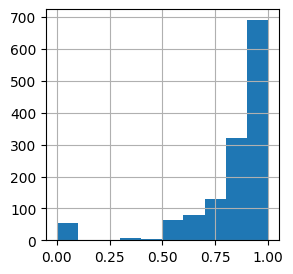

In [182]:
# Viz: Unreliable sellers (WIP)
fig, ax = mpp.subplots(figsize= (3,3))
seller_unreliability_data["delivery_on_time"].hist(bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
mpp.show()

In [183]:
### Order amounts & satisfaction

In [184]:
# ...

#### "Does it really matter?"

In [185]:
# Showing unreliable products
product_reliability_bounds = [0.00, 0.80] # example: 30% to 75% is [0.30, 0.75]
product_unreliability_data = product_delay_data[(product_reliability_bounds[1] >= product_delay_data["delivery_on_time"]) & (product_delay_data["delivery_on_time"] >= product_reliability_bounds[0])]

print("Found", len(product_unreliability_data), "unreliable products (of", len(product_delay_data), "in total):")
# display(product_unreliability_data)

Found 3569 unreliable products (of 32066 in total):


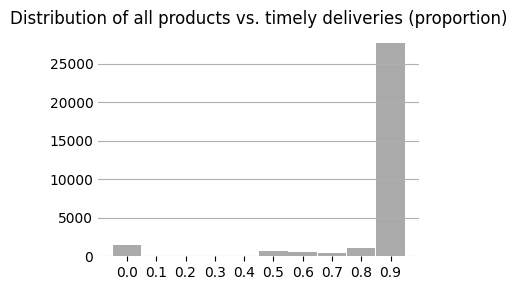

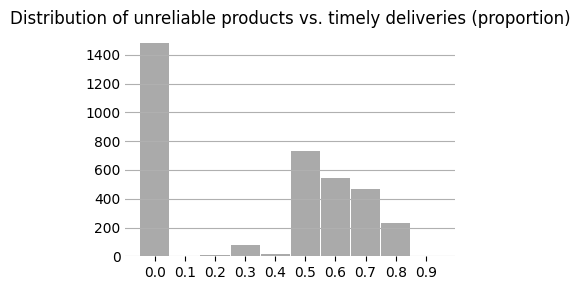

In [186]:
# Viz: All products

# fig, ax = mpp.subplots(figsize= (3,3))
# mpp.title("Distribution of all products vs. timely deliveries (proportion)")
# product_delay_data["delivery_on_time"].hist(bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# mpp.show()

fig, ax = mpp.subplots(figsize= (4,3))
mpp.title("Distribution of all products vs. timely deliveries (proportion)")
ax.hist(product_delay_data["delivery_on_time"], bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], color= "#AAAAAA", rwidth= 0.97, align= "left")
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.grid(axis= "y")
ax.tick_params(axis='y', which='both', length=0)
ax.set_frame_on(False)
mpp.tight_layout()
mpp.show()

# Viz: Unreliable products

# fig, ax = mpp.subplots(figsize= (3,3))
# mpp.title("Distribution of unreliable products vs. timely deliveries (proportion)")
# product_unreliability_data["delivery_on_time"].hist(bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# mpp.show()

fig, ax = mpp.subplots(figsize= (4,3))
mpp.title("Distribution of unreliable products vs. timely deliveries (proportion)")
ax.hist(product_unreliability_data["delivery_on_time"], bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], color= "#AAAAAA", rwidth= 0.97, align= "left")
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.grid(axis= "y")
ax.tick_params(axis='y', which='both', length=0)
ax.set_frame_on(False)
mpp.tight_layout()
mpp.show()

In [187]:
# Binned impact
for b in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]:
    print("-"*75)
    print("Product reliability bin (left-inclusive):", int(b*100), "% to", int((b + 0.1) * 100), "%")
    print("Count of intermediate reliability products:", len(product_delay_data[ (b <= product_delay_data["delivery_on_time"]) & (product_delay_data["delivery_on_time"] < b + .1)]["product_id"].unique()))
    print("Order total:", product_delay_data[ (b <= product_delay_data["delivery_on_time"]) & (product_delay_data["delivery_on_time"] < b + .1)]["order_total"].sum().round(2), "$")

print("-"*75)
print("Grand total:", product_delay_data["order_total"].sum().round())

# Financial "weight" of products, shown according to their unreliability
product_potentials = product_delay_data[["delivery_on_time", "order_total", "product_id"]].groupby("product_id").agg(
    delivery_on_time = ("delivery_on_time", "mean"),
    order_total = ("order_total", "sum")
).sort_values(by= "order_total", ascending= False).reset_index()

# Money wasted due to unsucessful delivery (for each product)
product_potentials["money_on_the_table"] = ( product_potentials["order_total"] * (1/product_potentials["delivery_on_time"] - 1) ).round(2) # = (product order total / reliability ) - product order total = prod (1/rel - 1) = prod (1/rel - rel/rel) = prod (1-rel) / rel
product_potentials["money_on_the_table"] = product_potentials["money_on_the_table"].replace(float('inf'), 0) # products never delivered are assigned a potential of 0
product_potentials["money_on_the_table_percent"] = ( 100 * product_potentials["money_on_the_table"] / (product_potentials["order_total"].sum()) ).round(5)
product_potentials.sort_values(by= "money_on_the_table", ascending = False, inplace= True)

# Total money to be gained by fully fixing unreliability:
print("-"*75)
print("Money on the table (a full correction of all reliabilites product-wide would amount to):")
print(
    product_potentials["money_on_the_table"].sum().round(), "$",
    "(which is",
    product_potentials["money_on_the_table_percent"].sum().round(),"%",    
    "of company capital)")

---------------------------------------------------------------------------
Product reliability bin (left-inclusive): 0 % to 10 %
Count of intermediate reliability products: 1483
Order total: 343024.14 $
---------------------------------------------------------------------------
Product reliability bin (left-inclusive): 10 % to 20 %
Count of intermediate reliability products: 2
Order total: 23272.1 $
---------------------------------------------------------------------------
Product reliability bin (left-inclusive): 20 % to 30 %
Count of intermediate reliability products: 12
Order total: 6795.33 $
---------------------------------------------------------------------------
Product reliability bin (left-inclusive): 30 % to 40 %
Count of intermediate reliability products: 77
Order total: 50397.34 $
---------------------------------------------------------------------------
Product reliability bin (left-inclusive): 40 % to 50 %
Count of intermediate reliability products: 17
Order total: 13

---------------------------------------------------------------------------
Order value of products by 10% reliability bins:
---------------------------------------------------------------------------
Below or 0 % reliability: 	Order total in question: 343024.14 $ 	(Cumulative contribution: 2.2 %)
Below or 10 % reliability: 	Order total in question: 365392.02 $ 	(Cumulative contribution: 2.3 %)
Below or 20 % reliability: 	Order total in question: 367365.59 $ 	(Cumulative contribution: 2.4 %)
Below or 30 % reliability: 	Order total in question: 373091.57 $ 	(Cumulative contribution: 2.4 %)
Below or 40 % reliability: 	Order total in question: 431457.43 $ 	(Cumulative contribution: 2.8 %)
Below or 50 % reliability: 	Order total in question: 716653.31 $ 	(Cumulative contribution: 4.6 %)
Below or 60 % reliability: 	Order total in question: 795033.47 $ 	(Cumulative contribution: 5.1 %)
Below or 70 % reliability: 	Order total in question: 1166592.0 $ 	(Cumulative contribution: 7.5 %)
Below or

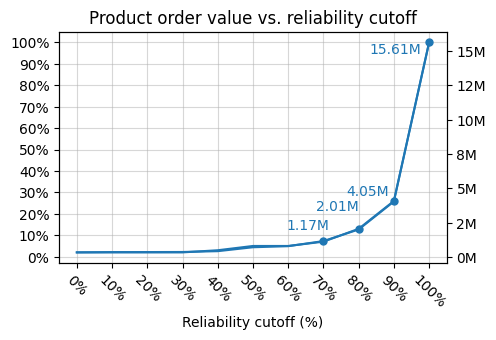

In [188]:
# Product reliability threshold vs. order value
# Printed out
tmp_list = []
print("-"*75)
print("Order value of products by 10% reliability bins:")
print("-"*75)
for reliability_threshold in range(0, 11):
    reliability_threshold = reliability_threshold / 10
    tmp_list.append({"percent_max_reliability": int(round(reliability_threshold * 100, 0)),
                     "weight_products_unreliable": product_potentials["order_total"] [product_potentials["delivery_on_time"] <= reliability_threshold].sum().round(2),
                     "percent_weight_products_unreliable": (product_potentials["order_total"] [product_potentials["delivery_on_time"] <= reliability_threshold].sum() / product_potentials["order_total"] [product_potentials["delivery_on_time"] <= 1.0].sum()).round(2) * 100})
    print("Below or", int(round(reliability_threshold * 100, 0)), "% reliability:",
          "\tOrder total in question:", product_potentials["order_total"] [product_potentials["delivery_on_time"] <= reliability_threshold].sum().round(2), "$",
          "\t(Cumulative contribution:", ((product_potentials["order_total"] [product_potentials["delivery_on_time"] <= reliability_threshold].sum() / product_potentials["order_total"] [product_potentials["delivery_on_time"] <= 1.0].sum()).round(3) * 100).round(1), "%)")

# As a graph
mpp.figure(figsize= (5, 3))
_ = pd.DataFrame(tmp_list).set_index("percent_max_reliability")["percent_weight_products_unreliable"].plot(title= "Product order value vs. reliability cutoff")
mpp.grid(alpha= 0.5)
mpp.xlabel("Reliability cutoff (%)")
# mpp.ylabel("Order value")

_.set_xticks([x for x in range(0, 101, 10)], labels= [f'{x}%' for x in range(0, 101, 10)])
_.tick_params(axis='x', labelrotation= -45)

_yticks = _.get_yticks()[1:-1]
# _.set_yticks(_yticks, labels=[f'{round(t)}%' for t in _yticks])
_.set_yticks([y for y in range(0, 101, 10)], labels= [f'{y}%' for y in range(0, 101, 10)])

__ = mpp.twinx()
__line2D, = __.plot(pd.DataFrame(tmp_list)["percent_max_reliability"], pd.DataFrame(tmp_list)["weight_products_unreliable"])
__.ticklabel_format(style='plain', axis='y')
__yticks = __.get_yticks()[1:-1] #Trimmed extrema to align with the % axis
__.set_yticks(__yticks, labels=[f'{round(t/1000000)}M' for t in __yticks])

__.plot(__line2D.get_xdata()[7], __line2D.get_ydata()[7], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[7] * 0.85, __line2D.get_ydata()[7] * 1.7, f'{round(__line2D.get_ydata()[7]/1000000, 2)}M', fontsize=10, color='#1f77b4')

__.plot(__line2D.get_xdata()[8], __line2D.get_ydata()[8], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[8] * 0.85, __line2D.get_ydata()[8] * 1.7, f'{round(__line2D.get_ydata()[8]/1000000, 2)}M', fontsize=10, color='#1f77b4')

__.plot(__line2D.get_xdata()[9], __line2D.get_ydata()[9], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[9] * 0.85, __line2D.get_ydata()[9] * 1.1, f'{round(__line2D.get_ydata()[9]/1000000, 2)}M', fontsize=10, color='#1f77b4')

__.plot(__line2D.get_xdata()[10], __line2D.get_ydata()[10], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[10] * 0.83, __line2D.get_ydata()[10] * 0.95, f'{round(__line2D.get_ydata()[10]/1000000, 2)}M', fontsize=10, color='#1f77b4')

mpp.show()

Total money on the table: 1.62M$ (10.38%)


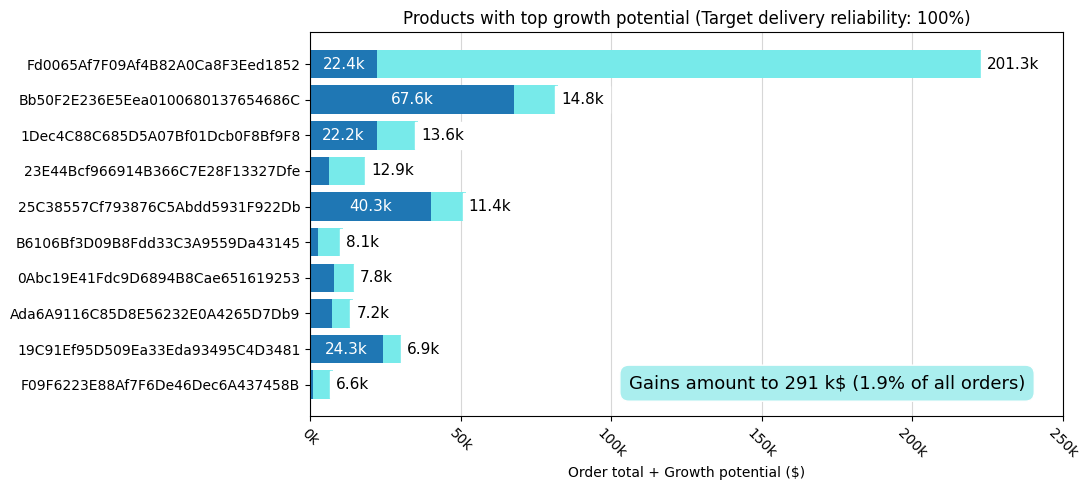

In [189]:
# Top 10 worthwhile products as a graph
print(f"Total money on the table: {round(product_potentials["money_on_the_table"].sum()/1000000, 2)}M$ ({round(100 * product_potentials["money_on_the_table"].sum()/product_potentials["order_total"].sum(), 2)}%)")

fig, _ = mpp.subplots(figsize= (11, 5))
mpp.title("Products with top growth potential (Target delivery reliability: 100%)")

bars1 = _.barh([s.title() for s in product_potentials["product_id"].head(10)], product_potentials["order_total"].head(10), color= "#1f77b4", zorder= 2)
bars2 = _.barh([s.title() for s in product_potentials["product_id"].head(10)], product_potentials["money_on_the_table"].head(10), left= product_potentials["order_total"].head(10), color= "#77EAEA", zorder= 2)

mpp.xlabel("Order total + Growth potential ($)")
mpp.xticks(range(0, int(max(product_potentials["order_total"].head(10) + product_potentials["money_on_the_table"].head(10))*1.3), 50000))
# _.set_xticks(_.get_xticks(), labels=[f'{int(round(t/1000, 0))}k' for t in _.get_xticks()])
# _.set_xticks(_.get_xticks(), labels=[f'{round(t/1000000, 2)}M' for t in _.get_xticks()])
_.set_xticks(_.get_xticks(), labels= [f'{round(t/1000000, 2)}M' if t >= 1000000 else f'{int(round(t/1000, 0))}k' for t in _.get_xticks()])
_.tick_params(axis='x', labelrotation= -45)
mpp.gca().invert_yaxis()

_.text(
    x= 0.95, y= 0.11,                
    s= f'Gains amount to {int((product_potentials["money_on_the_table"].head(10).sum()/1000).round())} k$ ({(product_potentials["money_on_the_table_percent"].head(10).sum().round(1))}% of all orders)',
    ha= 'right', va= 'top',          
    transform=_.transAxes,           
    fontsize= 13,                   
    bbox= dict(
        boxstyle= 'round, pad= 0.5',  
        facecolor= '#AAEEEE',       
        edgecolor= 'white',         
        alpha= 1                    
    )
)

[_.text(
        bar.get_width()/2,                    
        bar.get_y() + bar.get_height() / 2,               
        f'{(bar.get_width()/1000).round(1)}k',              
        ha='center',                
        va='center',                
        color='white',             
        fontsize=11
    )
 for bar in bars1 if bar.get_width() > 10000]

[_.text(
        bar.get_x() + bar.get_width() + 1000,                   
        bar.get_y() + bar.get_height() / 2,           
        f'{(bar.get_width()/1000).round(1)}k',                
        ha='left',              
        va='center',               
        color='black',            
        fontsize=11,
        bbox= dict(
            boxstyle= 'square, pad= 0.4',  
            facecolor= 'white',     
            edgecolor= 'white',       
            alpha= 1                    
        )
    )
 for bar in bars2 if bar.get_width() > 5000]

mpp.grid(axis= "x", zorder= 1, alpha= 0.5)
mpp.tight_layout()
mpp.show()

#### "Can it be controlled?"

#### "So... what to do now?"

### Delays by seller

In [190]:
# Further aggregation from product_delay_data
seller_delay_data = product_delay_data.groupby("seller_id").agg(
        product_count = ("product_id", "nunique"),
        delivery_duration = ("delivery_duration", "mean"),
        delivery_accuracy = ("delivery_accuracy", "mean"),
        delivery_on_time = ("delivery_on_time", "mean"),
        order_total = ("order_total", "sum")
    ).reset_index()

# Dropping NAs resulting from merging (0)
print(len(seller_delay_data))
seller_delay_data.dropna(inplace= True)
print(len(seller_delay_data))

# Formatting
seller_delay_data["delivery_duration"] = pd.to_timedelta(seller_delay_data["delivery_duration"]).dt.round('s') # rounding back to seconds
seller_delay_data["delivery_accuracy"] = pd.to_timedelta(seller_delay_data["delivery_accuracy"]).dt.round('s') # rounding back to seconds
seller_delay_data["delivery_on_time"] = pd.to_numeric(seller_delay_data["delivery_on_time"]).round(2) # here, delivery_on_time is no longer a per product average, but a per seller "performance" factor
# We can now say, e.g., "this seller delivers on time 43% of the time"

# Sorting by delivery_on_time
seller_delay_data = seller_delay_data.sort_values(["delivery_on_time", "delivery_duration", "delivery_accuracy"], ascending = [True, False, False])
display(seller_delay_data)

2932
2932


seller_id  product_count delivery_duration  \
2562  df683dfda87bf71ac3fc63063fba369d              1 189 days 20:42:57   
1660  8e670472e453ba34a379331513d6aab1              1  86 days 00:01:41   
...                                ...            ...               ...   
1108  5e063e85d44b0f5c3e6ec3131103a57e              1   1 days 06:55:12   
221   139157dd4daa45c25b0807ffff348363              1   1 days 05:08:25   

      delivery_accuracy  delivery_on_time  order_total  
2562  167 days 17:00:07               0.0        55.95  
1660   35 days 17:09:10               0.0      1083.96  
...                 ...               ...          ...  
1108  -7 days +17:08:49               1.0        30.32  
221  -13 days +16:18:07               1.0        37.68  

[2932 rows x 6 columns]

In [191]:
# Showing unreliable sellers
seller_reliability_bounds = [0.00, 0.80] # example: 30% to 75% is [0.30, 0.75]
seller_unreliability_data = seller_delay_data[(seller_reliability_bounds[1] >= seller_delay_data["delivery_on_time"]) & (seller_delay_data["delivery_on_time"] >= seller_reliability_bounds[0])]

print("Found", len(seller_unreliability_data), "sellers (of", len(seller_delay_data), "in total):")
display(seller_unreliability_data)

Found 379 sellers (of 2932 in total):


seller_id  product_count delivery_duration  \
2562  df683dfda87bf71ac3fc63063fba369d              1 189 days 20:42:57   
1660  8e670472e453ba34a379331513d6aab1              1  86 days 00:01:41   
...                                ...            ...               ...   
803   457fe919b032a3f7dadba6fb92cf7855              5   4 days 00:20:27   
1338  7210cd29727d674c00741e5e387b3ccd              5   3 days 12:30:46   

     delivery_accuracy  delivery_on_time  order_total  
2562 167 days 17:00:07               0.0        55.95  
1660  35 days 17:09:10               0.0      1083.96  
...                ...               ...          ...  
803  -7 days +13:16:35               0.8       464.00  
1338 -8 days +19:23:08               0.8       518.38  

[379 rows x 6 columns]

#### "Does it really matter?"

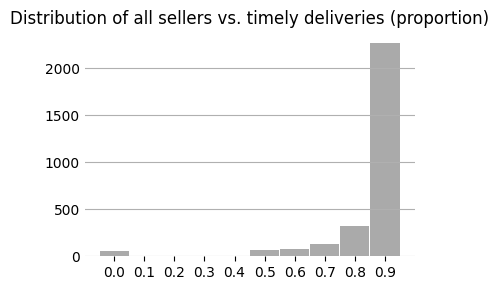

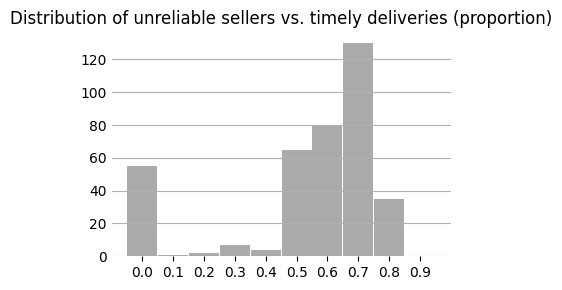

---------------------------------------------------------------------------
Count of 0% reliability sellers: 55
Order total: 18202.43 $
---------------------------------------------------------------------------
Count of intermediate reliability sellers: 324
Order total: 950600.06 $

Details:
Bin [1e-05, 0.1) :	 0 seller(s)
Bin [0.1, 0.2) :	 1 seller(s)
Bin [0.2, 0.3) :	 2 seller(s)
Bin [0.3, 0.4) :	 7 seller(s)
Bin [0.4, 0.5) :	 4 seller(s)
Bin [0.5, 0.6) :	 65 seller(s)
Bin [0.6, 0.7) :	 80 seller(s)
Bin [0.7, 0.8) :	 130 seller(s)
Bin [0.8, 0.9) :	 35 seller(s)
Bin [0.9, 1.0) :	 0 seller(s)
---------------------------------------------------------------------------
Count of 100% reliability sellers: 0
Order total: 0.0 $


In [192]:
# Viz: All sellers

# fig, ax = mpp.subplots(figsize= (3,3))
# mpp.title("Distribution of all sellers vs. timely deliveries (proportion)")
# seller_delay_data["delivery_on_time"].hist(bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# mpp.show()

fig, ax = mpp.subplots(figsize= (4,3))
mpp.title("Distribution of all sellers vs. timely deliveries (proportion)")
ax.hist(seller_delay_data["delivery_on_time"], bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], color= "#AAAAAA", rwidth= 0.97, align= "left")
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.grid(axis= "y")
ax.tick_params(axis='y', which='both', length=0)
ax.set_frame_on(False)
mpp.tight_layout()
mpp.show()

# Viz: Unreliable sellers

# fig, ax = mpp.subplots(figsize= (3,3))
# mpp.title("Distribution of unreliable sellers vs. timely deliveries (proportion)")
# seller_unreliability_data["delivery_on_time"].hist(bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# mpp.show()

fig, ax = mpp.subplots(figsize= (4,3))
mpp.title("Distribution of unreliable sellers vs. timely deliveries (proportion)")
ax.hist(seller_unreliability_data["delivery_on_time"], bins= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], color= "#AAAAAA", rwidth= 0.97, align= "left")
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.grid(axis= "y")
ax.tick_params(axis='y', which='both', length=0)
ax.set_frame_on(False)
mpp.tight_layout()
mpp.show()

print("-"*75)
print("Count of 0% reliability sellers:", len(seller_unreliability_data[seller_unreliability_data["delivery_on_time"] == 0]["seller_id"].unique()))
print("Order total:", seller_unreliability_data[seller_unreliability_data["delivery_on_time"] == 0]["order_total"].sum().round(2), "$")

print("-"*75)
print("Count of intermediate reliability sellers:", len(seller_unreliability_data[ (0 < seller_unreliability_data["delivery_on_time"]) & (seller_unreliability_data["delivery_on_time"] < 1)]["seller_id"].unique()))
print("Order total:", seller_unreliability_data[ (0 < seller_unreliability_data["delivery_on_time"]) & (seller_unreliability_data["delivery_on_time"] < 1)]["order_total"].sum().round(2), "$")

print("\nDetails:")
[print("Bin", i, ":\t", x["count"], "seller(s)") for i, x in pd.DataFrame(pd.cut(seller_unreliability_data["delivery_on_time"], bins= [0.00001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], right= False).value_counts().reset_index().sort_values(by= "delivery_on_time").set_index("delivery_on_time")).iterrows()] # gist: iterrows() over a values_count(bins) of the data, printing the returned (index, value) pair

print("-"*75)
print("Count of 100% reliability sellers:", len(seller_unreliability_data[seller_unreliability_data["delivery_on_time"] == 1]["seller_id"].unique()))
print("Order total:", seller_unreliability_data[seller_unreliability_data["delivery_on_time"] == 1]["order_total"].sum().round(2), "$")

In [193]:
# Filter by bins, print bin, count, order weight, gain potential (+ average rating?)
for b in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]:
    print("-"*75)
    print("Seller reliability bin (left-inclusive):", int(b*100), "% to", int((b + 0.1) * 100), "%")
    print("Count of intermediate reliability sellers:", len(seller_delay_data[ (b <= seller_delay_data["delivery_on_time"]) & (seller_delay_data["delivery_on_time"] < b + .1)]["seller_id"].unique()))
    print("Order total:", seller_delay_data[ (b <= seller_delay_data["delivery_on_time"]) & (seller_delay_data["delivery_on_time"] < b + .1)]["order_total"].sum().round(2), "$")

print("-"*75)
print("Grand total:", seller_delay_data["order_total"].sum().round())

# Financial "weight" of sellers, shown according to their unreliability
seller_potentials = seller_delay_data[["delivery_on_time", "order_total", "seller_id"]].groupby("seller_id").agg(
    delivery_on_time = ("delivery_on_time", "mean"),
    order_total = ("order_total", "sum")
).sort_values(by= "order_total", ascending= False).reset_index()

# Money wasted due to sellers not fulfilling deliveries (for each seller)
seller_potentials["money_on_the_table"] = ( seller_potentials["order_total"] * (1/seller_potentials["delivery_on_time"] - 1) ).round(2) # (order_total / reliability ) - order_total = tot (1/rel - 1) = tot (1/rel - rel/rel) = tot (1-rel) / rel
seller_potentials["money_on_the_table"] = seller_potentials["money_on_the_table"].replace(float('inf'), 0) # sellers who never delivered are assigned a potential of 0
seller_potentials["money_on_the_table_percent"] = ( 100 * seller_potentials["money_on_the_table"] / (seller_potentials["order_total"].sum()) ).round(5)
seller_potentials.sort_values(by= "money_on_the_table", ascending = False, inplace= True)

# Total money to be gained by fully fixing unreliability:
print("-"*75)
print("Money on the table (a full correction of all reliabilites seller-wide would amount to):")
print(
    seller_potentials["money_on_the_table"].sum().round(), "$",
    "(which is",
    seller_potentials["money_on_the_table_percent"].sum().round(),"%",    
    "of company capital)")

# display(seller_delay_data)
# display(seller_potentials)

# TODO: Effect on ratings?

---------------------------------------------------------------------------
Seller reliability bin (left-inclusive): 0 % to 10 %
Count of intermediate reliability sellers: 55
Order total: 18202.43 $
---------------------------------------------------------------------------
Seller reliability bin (left-inclusive): 10 % to 20 %
Count of intermediate reliability sellers: 1
Order total: 1420.54 $
---------------------------------------------------------------------------
Seller reliability bin (left-inclusive): 20 % to 30 %
Count of intermediate reliability sellers: 2
Order total: 696.49 $
---------------------------------------------------------------------------
Seller reliability bin (left-inclusive): 30 % to 40 %
Count of intermediate reliability sellers: 7
Order total: 15063.86 $
---------------------------------------------------------------------------
Seller reliability bin (left-inclusive): 40 % to 50 %
Count of intermediate reliability sellers: 4
Order total: 7230.42 $
---------

---------------------------------------------------------------------------
Order value of sellers by 10% reliability bins:
---------------------------------------------------------------------------
Below or 0 % reliability: 	Order total in question: 18202.43 $ 	(Cumulative contribution: 0.1 %)
Below or 10 % reliability: 	Order total in question: 18202.43 $ 	(Cumulative contribution: 0.1 %)
Below or 20 % reliability: 	Order total in question: 19622.97 $ 	(Cumulative contribution: 0.1 %)
Below or 30 % reliability: 	Order total in question: 20319.46 $ 	(Cumulative contribution: 0.1 %)
Below or 40 % reliability: 	Order total in question: 35383.32 $ 	(Cumulative contribution: 0.2 %)
Below or 50 % reliability: 	Order total in question: 98551.42 $ 	(Cumulative contribution: 0.6 %)
Below or 60 % reliability: 	Order total in question: 188729.39 $ 	(Cumulative contribution: 1.2 %)
Below or 70 % reliability: 	Order total in question: 432233.87 $ 	(Cumulative contribution: 2.8 %)
Below or 80 % r

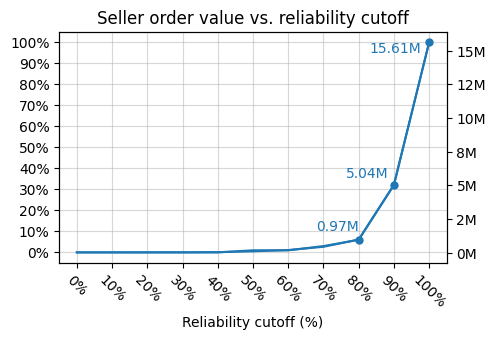

In [194]:
# Seller reliability threshold vs. order value
# Printed out
tmp_list = []
print("-"*75)
print("Order value of sellers by 10% reliability bins:")
print("-"*75)
for reliability_threshold in range(0, 11):
    reliability_threshold = reliability_threshold / 10
    tmp_list.append({"percent_max_reliability": int(round(reliability_threshold * 100, 0)),
                     "weight_sellers_unreliable": seller_potentials["order_total"] [seller_potentials["delivery_on_time"] <= reliability_threshold].sum().round(2),
                     "percent_weight_sellers_unreliable": (seller_potentials["order_total"] [seller_potentials["delivery_on_time"] <= reliability_threshold].sum() / seller_potentials["order_total"] [seller_potentials["delivery_on_time"] <= 1.0].sum()).round(2) * 100})
    print("Below or", int(round(reliability_threshold * 100, 0)), "% reliability:",
          "\tOrder total in question:", seller_potentials["order_total"] [seller_potentials["delivery_on_time"] <= reliability_threshold].sum().round(2), "$",
          "\t(Cumulative contribution:", ((seller_potentials["order_total"] [seller_potentials["delivery_on_time"] <= reliability_threshold].sum() / seller_potentials["order_total"] [seller_potentials["delivery_on_time"] <= 1.0].sum()).round(3) * 100).round(1), "%)")

# As a graph
mpp.figure(figsize= (5, 3))
_ = pd.DataFrame(tmp_list).set_index("percent_max_reliability")["percent_weight_sellers_unreliable"].plot(title= "Seller order value vs. reliability cutoff")
mpp.grid(alpha= 0.5)
mpp.xlabel("Reliability cutoff (%)")
# mpp.ylabel("Order value")

_.set_xticks([x for x in range(0, 101, 10)], labels= [f'{x}%' for x in range(0, 101, 10)])
_.tick_params(axis='x', labelrotation= -45)

_yticks = _.get_yticks()[1:-1]
# _.set_yticks(_yticks, labels=[f'{round(t)}%' for t in _yticks])
_.set_yticks([y for y in range(0, 101, 10)], labels= [f'{y}%' for y in range(0, 101, 10)])

__ = mpp.twinx()
__line2D, = __.plot(pd.DataFrame(tmp_list)["percent_max_reliability"], pd.DataFrame(tmp_list)["weight_sellers_unreliable"])
__.ticklabel_format(style='plain', axis='y')
__yticks = __.get_yticks()[1:-1] #Trimmed extrema to align with the % axis
__.set_yticks(__yticks, labels=[f'{round(t/1000000)}M' for t in __yticks])

__.plot(__line2D.get_xdata()[8], __line2D.get_ydata()[8], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[8] * 0.85, __line2D.get_ydata()[8] * 1.7, f'{round(__line2D.get_ydata()[8]/1000000, 2)}M', fontsize=10, color='#1f77b4')

__.plot(__line2D.get_xdata()[9], __line2D.get_ydata()[9], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[9] * 0.85, __line2D.get_ydata()[9] * 1.1, f'{round(__line2D.get_ydata()[9]/1000000, 2)}M', fontsize=10, color='#1f77b4')

__.plot(__line2D.get_xdata()[10], __line2D.get_ydata()[10], marker='o', color='#1f77b4', markersize= 5)
__.text(__line2D.get_xdata()[10] * 0.83, __line2D.get_ydata()[10] * 0.95, f'{round(__line2D.get_ydata()[10]/1000000, 2)}M', fontsize=10, color='#1f77b4')

mpp.show()

Total money on the table: 1.5M$ (9.59%)


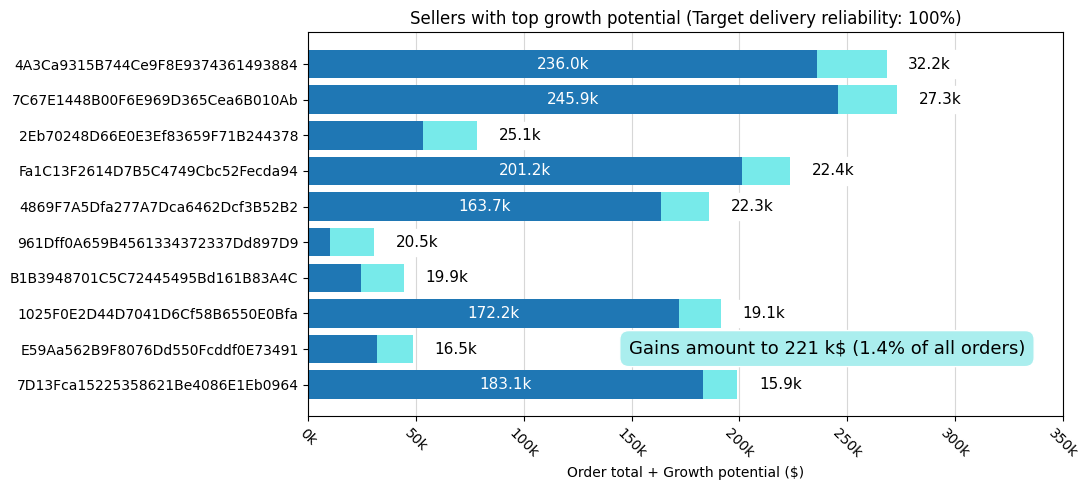

In [195]:
# Top 10 worthwhile sellers as a graph
print(f"Total money on the table: {round(seller_potentials["money_on_the_table"].sum()/1000000, 2)}M$ ({round(100 * seller_potentials["money_on_the_table"].sum()/seller_potentials["order_total"].sum(), 2)}%)")


fig, _ = mpp.subplots(figsize= (11, 5))
mpp.title("Sellers with top growth potential (Target delivery reliability: 100%)")

bars1 = _.barh([s.title() for s in seller_potentials["seller_id"].head(10)], seller_potentials["order_total"].head(10), color= "#1f77b4", zorder= 2)
bars2 = _.barh([s.title() for s in seller_potentials["seller_id"].head(10)], seller_potentials["money_on_the_table"].head(10), left= seller_potentials["order_total"].head(10), color= "#77EAEA", zorder= 2)

mpp.xlabel("Order total + Growth potential ($)")
mpp.xticks(range(0, int(max(seller_potentials["order_total"].head(10) + seller_potentials["money_on_the_table"].head(10))*1.3), 50000))
# _.set_xticks(_.get_xticks(), labels=[f'{int(round(t/1000, 0))}k' for t in _.get_xticks()])
# _.set_xticks(_.get_xticks(), labels=[f'{round(t/1000000, 2)}M' for t in _.get_xticks()])
_.set_xticks(_.get_xticks(), labels= [f'{round(t/1000000, 2)}M' if t >= 1000000 else f'{int(round(t/1000, 0))}k' for t in _.get_xticks()])
_.tick_params(axis='x', labelrotation= -45)
mpp.gca().invert_yaxis()

_.text(
    x= 0.95, y= 0.2,                
    s= f'Gains amount to {int((seller_potentials["money_on_the_table"].head(10).sum()/1000).round())} k$ ({(seller_potentials["money_on_the_table_percent"].head(10).sum().round(1))}% of all orders)',
    ha= 'right', va= 'top',
    transform=_.transAxes,
    fontsize= 13,
    bbox= dict(
        boxstyle= 'round, pad= 0.5',
        facecolor= '#AAEEEE',
        edgecolor= 'white',
        alpha= 1
    )
)

[_.text(
    bar.get_width()/2,
    bar.get_y() + bar.get_height() / 2,
    f'{(bar.get_width()/1000).round(1)}k',
    ha='center',
    va='center',
    color='white',
    fontsize=11
    )
 for bar in bars1 if bar.get_width() > 100000]

[_.text(
    bar.get_x() + bar.get_width() + 10000,
    bar.get_y() + bar.get_height() / 2,
    f'{(bar.get_width()/1000).round(1)}k',
    ha='left',
    va='center',
    color='black',
    fontsize=11,
    bbox= dict(
        boxstyle= 'square, pad= 0.4',
        facecolor= 'white',
        edgecolor= 'white',
        alpha= 1                    
        )
    )
 for bar in bars2 if bar.get_width() > 15000]

mpp.grid(axis= "x", zorder= 1, alpha= 0.5)
mpp.tight_layout()
mpp.show()

#### "Can it be controlled?"

#### "So.. what to do now?"

### Possible additions

In [196]:
# Order amounts vs. satisfaction: Do customers rate smaller or bigger orders better? (May not be be worth investigating -- not actionable enough)

In [197]:
# Delivery durations vs. customer tolerance: Are customers more forgiving of a delay of X for longer delivery durations?